## Packages

### Install

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -U statsmodels

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install Jinja2

Note: you may need to restart the kernel to use updated packages.


### Import

In [12]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import seaborn as sns # seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import pyreadstat # for reading .sav file

from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split # for separating train and test data, scaling, model building, ...
from scipy import stats # it contains a large number of statistics, probability distributions functions
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python
from sklearn.impute import KNNImputer # Imputation for completing missing values using k-Nearest Neighbors
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer # Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion
from sklearn.ensemble import RandomForestClassifier # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from xgboost import XGBClassifier, XGBRFClassifier

from boruta import BorutaPy # Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler# Implementation of SMOTE - Synthetic Minority Over-sampling Technique , ADASYN, ROSE
from imblearn.combine import SMOTEENN
from collections import Counter # A Counter is a container that keeps track of how many times equivalent values are added
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix # plot confusion matrix
from sklearn.metrics import accuracy_score # Accuracy classification score
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics.
from sklearn import preprocessing # provides the StandardScaler utility class, which is a quick and easy way to perform operations
from sklearn.preprocessing import StandardScaler # To normalize the data for KNNImputer
from sklearn.manifold import TSNE # To visualize high dimensional data
from collections import Counter # To save the counted values as dict keys
from sklearn.decomposition import PCA #PCA Analysis
from sklearn.pipeline import Pipeline #Pipeline to connect scalers and classifiers
from matplotlib.pyplot import figure #Plot graph
from sklearn.metrics import roc_curve, roc_auc_score #Evaluate ROC curve
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
from sklearn.metrics import cohen_kappa_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [13]:
import warnings
warnings.filterwarnings('ignore')

## 1. Read Data

In [14]:
# reading data as a data frame, setting ID as the index and getting the number of rows and columns
#df = pd.DataFrame(pd.read_spss("../data/secom_mod.SAV"))
df= pd.read_spss(r'C:\Users\s0576758\Desktop\HTW\Data Mining - Tilo\secom_mod.SAV')
df = df.set_index('ID')
df.shape

(1567, 592)

## 2. Explore data

#### 2.1. Shape and type

In [15]:
# shape of the data set
print('Shape: ',df.shape)  

Shape:  (1567, 592)


In [16]:
# checking data types of the features
print(df.info(),"\n")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1567 entries, 1.0 to 1567.0
Columns: 592 entries, class to feature590
dtypes: float64(591), object(1)
memory usage: 7.1+ MB
None 

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object


#### 2.2. Duplicates

In [17]:
# Check for duplicated rows
df.duplicated().any()

False

In [18]:
#Check for duplicated columns
#df.columns.duplicated().any()

listofName = list(df.columns)
testID = df[[c for c in df if c not in listofName]]
#its runnig for the whole DF
testRows = df[df.duplicated()]
testRows.head()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,


In [19]:
####Test

#### 2.3. Pass / Fail ratio

In [20]:
# number of pass and fail values
df['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

In [21]:
# pie chart of the target variable
def ClassDistributionGraph(df, title):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    
    labels = ['Pass', 'Fail']
    distribution = df.value_counts()
    colors = ['lightblue', 'yellowgreen']

    # Plot
    plt.pie(distribution, labels=labels, colors=colors, autopct= lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*distribution.sum()), shadow=True, startangle=140,)
    plt.title(title, fontsize=15)
    plt.axis('equal')
    plt.show()

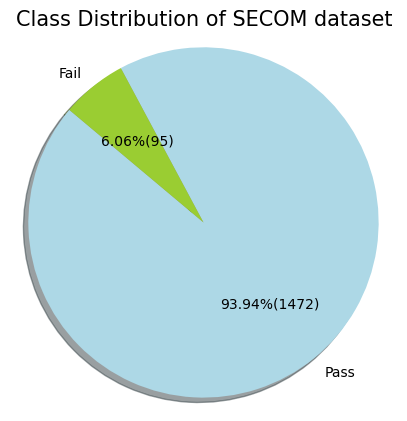

In [22]:
ClassDistributionGraph(df['class'], 'Class Distribution of SECOM dataset')

#### 2.4. Histogram of features

23 9 8 3


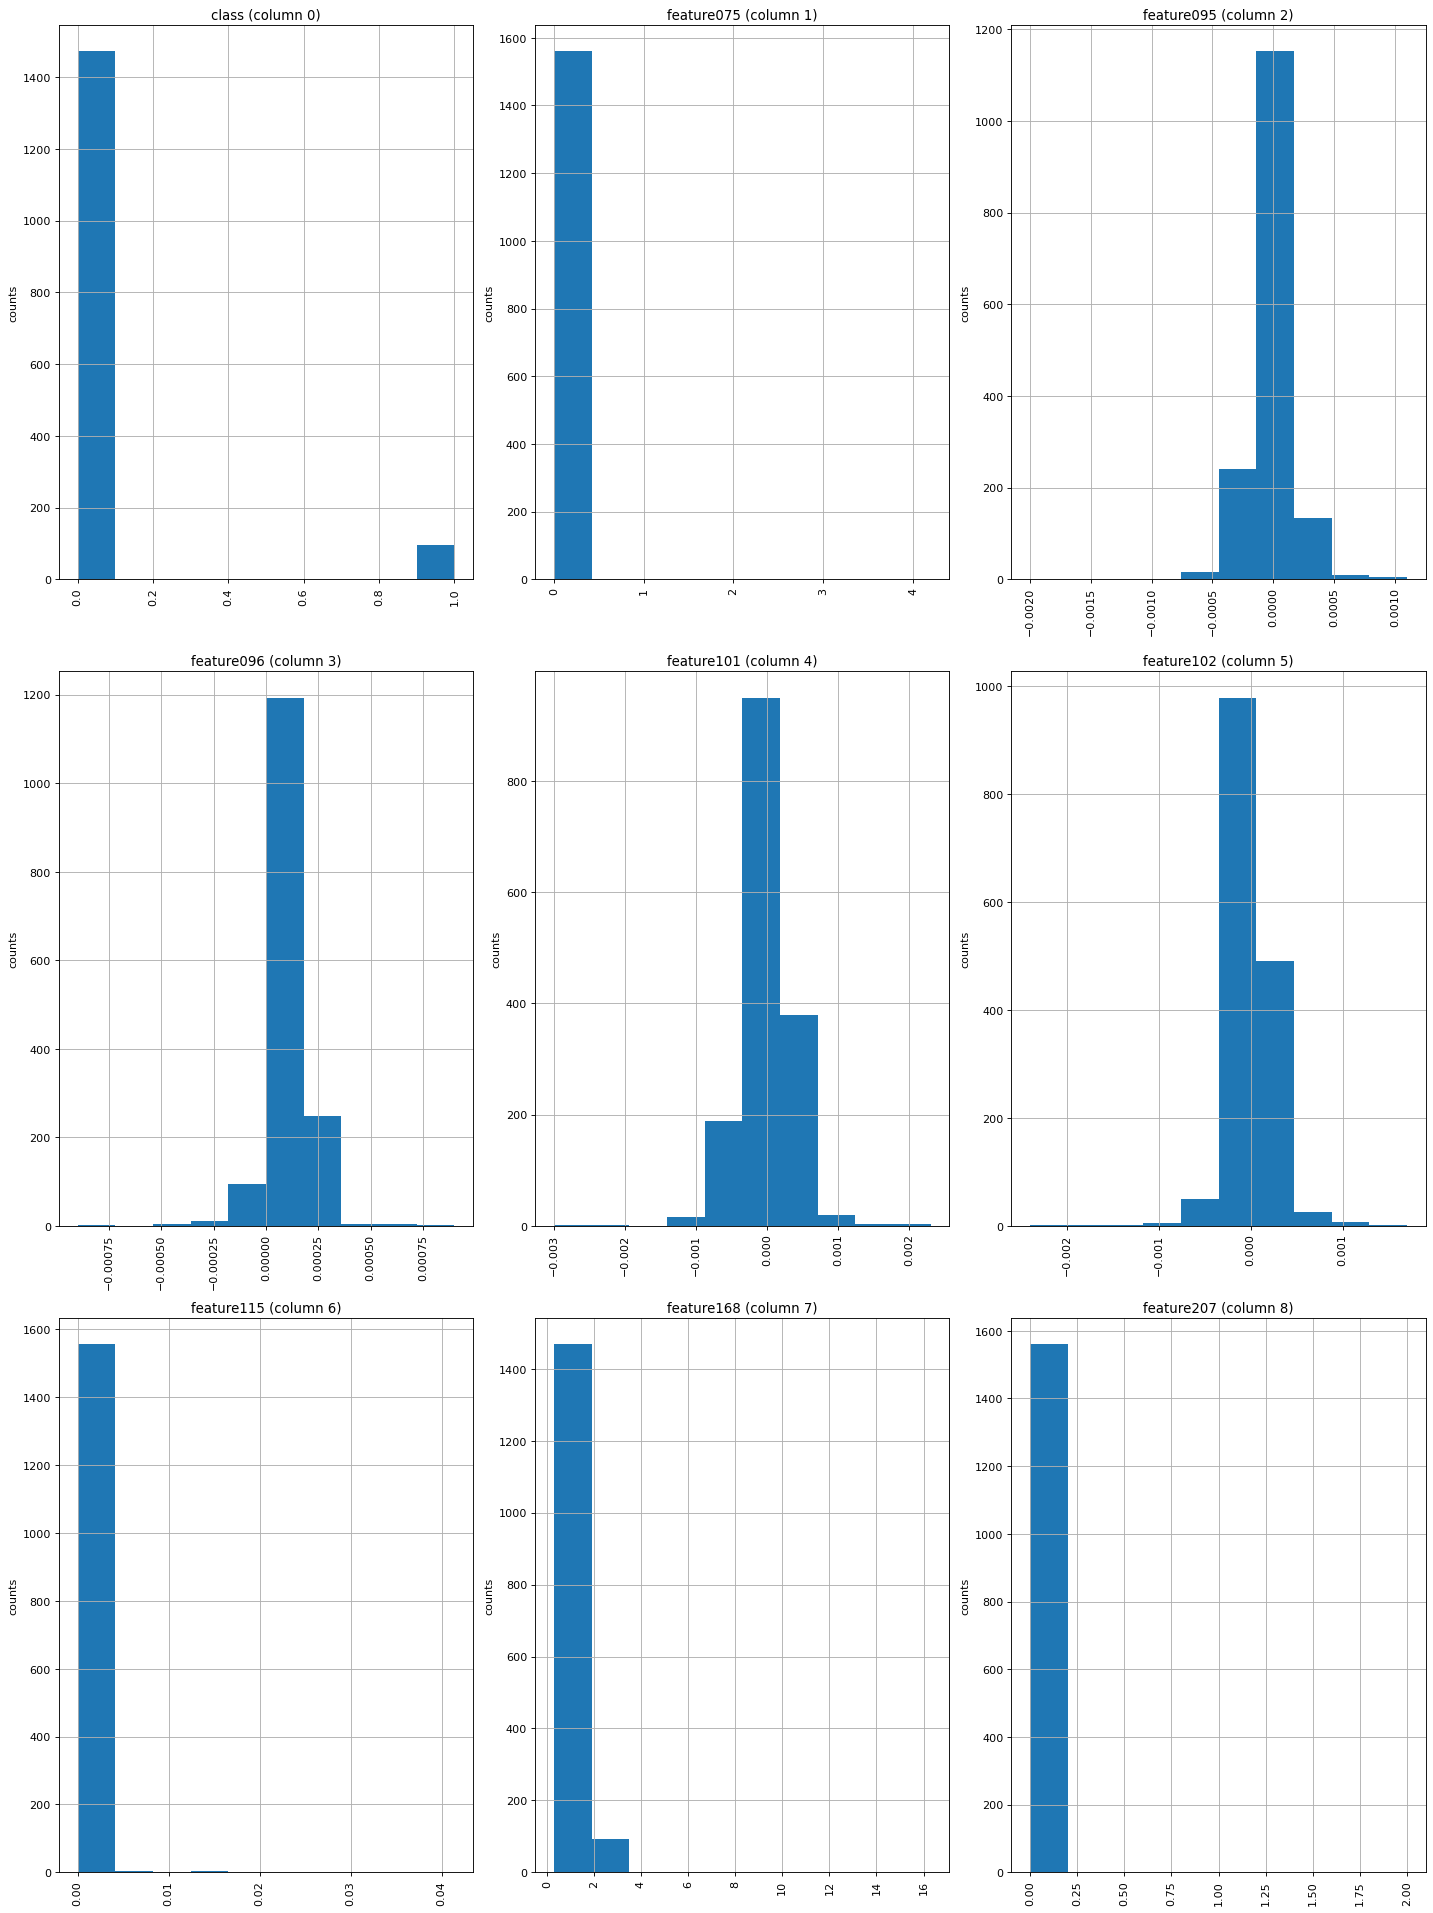

In [23]:
# histogram of some of the features
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
 
    
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    %matplotlib inline
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
   
    print(nCol, nGraphShown, nGraphRow, nGraphPerRow)
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 9, 3)

#### 2.5. Correlation

In [24]:
# Correlation Histogram

def correlation(df):
    cor_matrix = pd.DataFrame(df.corr())

    # Remove reuntant values by selecting only the upper correlation triangle
    upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool)))

    # Convert the upper correlation triangle to a Series
    corlist = pd.Series(upper_tri.values.ravel('F'))

    # Correlation Histogram
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    # Plot Histogram on x
    plt.hist(corlist, bins =50)
    plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient');

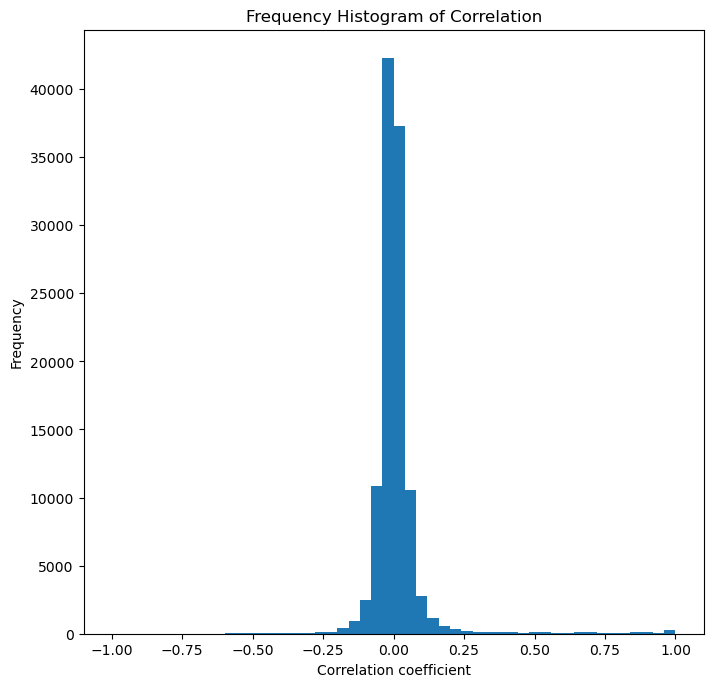

In [25]:
correlation(df)

#### 2.6. Missing values

In [26]:
# Total number of Nan values in the dataframe
df.isna().sum().sum()

41951

In [27]:
#number of cols with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print('number of columns with missing values = ', len(nan_cols))

#number of rows with Nan values
nan_rows = df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows
print('number of rows with missing values = ', len(nan_rows))

number of columns with missing values =  538
number of rows with missing values =  1567


## 3. Preprocessing

In [28]:
# Give text labels to the training examples
df['class'] = df['class'].replace({0: "PASS", 1: "FAIL"})
df.tail()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1563.0,PASS,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1564.0,PASS,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1565.0,PASS,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1566.0,PASS,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941
1567.0,PASS,17/10/2008 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,...,0.0045,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844


## 4. Data Preparation

### 4.1.Splitting Traninig and Test Data

In [29]:
# Split df into X and y
y = df['class']
X = df.drop('class', axis=1)

In [30]:
# Train-test split
X_train, X_test_ , y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle=True, random_state=100, stratify=y)

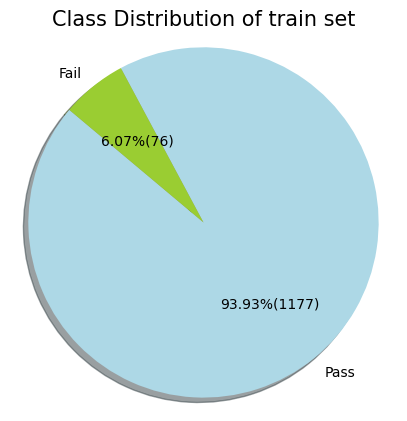

In [31]:
# pie chart for the train set
ClassDistributionGraph(y_train, 'Class Distribution of train set')

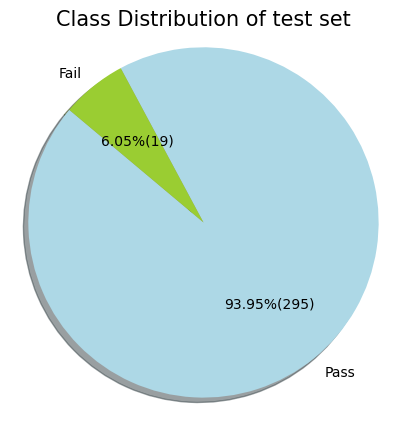

In [32]:
# pie chart for the test set
ClassDistributionGraph(y_test, 'Class Distribution of test set')

### 4.2 Rough feature reduction

#### 4.2.1 Removal of timestamp

In [33]:
# removing timestamp
X_train= X_train.drop(columns='timestamp')

#### 4.2.2 Removal of constants

In [34]:
#columns that have the same value excluding nan
print(len(X_train.columns[X_train.nunique() == 1]))

#column names with same value in it
X_train.columns[X_train.nunique() == 1]
print(list(X_train.columns[X_train.nunique() == 1]))

#remove these columns since it adds no value
single_value_columns = list(X_train.columns[X_train.nunique() == 1])
X_train=X_train.drop(columns=single_value_columns)
X_train

116
['feature006', 'feature014', 'feature043', 'feature050', 'feature053', 'feature070', 'feature098', 'feature142', 'feature150', 'feature179', 'feature180', 'feature187', 'feature190', 'feature191', 'feature192', 'feature193', 'feature194', 'feature195', 'feature227', 'feature230', 'feature231', 'feature232', 'feature233', 'feature234', 'feature235', 'feature236', 'feature237', 'feature238', 'feature241', 'feature242', 'feature243', 'feature244', 'feature257', 'feature258', 'feature259', 'feature260', 'feature261', 'feature262', 'feature263', 'feature264', 'feature265', 'feature266', 'feature267', 'feature277', 'feature285', 'feature314', 'feature315', 'feature316', 'feature323', 'feature326', 'feature327', 'feature328', 'feature329', 'feature330', 'feature331', 'feature365', 'feature370', 'feature371', 'feature372', 'feature373', 'feature374', 'feature375', 'feature376', 'feature379', 'feature380', 'feature381', 'feature382', 'feature395', 'feature396', 'feature397', 'feature398', '

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
240.0,3061.98,2344.91,2197.2667,911.2054,1.3257,104.1722,0.1208,1.3595,0.0063,-0.0034,...,0.0052,78.5378,0.4915,0.0114,0.0031,2.3265,0.0235,0.0184,0.0052,78.5378
183.0,2928.03,2497.03,2221.9444,1551.6947,1.5296,99.2678,0.1222,1.4494,-0.0013,0.0042,...,0.0081,264.7525,0.5005,0.0203,0.0052,4.0460,0.0077,0.0204,0.0081,264.7525
971.0,3066.18,2539.01,2180.5556,1165.1351,0.7892,101.4578,0.1226,1.4454,0.0177,0.0017,...,0.0053,71.0108,0.4999,0.0174,0.0046,3.4860,0.0223,0.0159,0.0053,71.0108
193.0,2956.64,2436.12,2139.2667,1123.3450,1.3699,102.2522,0.1254,1.3840,-0.0150,0.0095,...,NaN,NaN,0.4948,0.0149,0.0036,3.0214,0.0112,0.0191,0.0058,170.4645
1240.0,2937.77,2532.30,2198.8556,1031.1917,1.3204,102.7622,0.1235,1.4294,0.0138,0.0052,...,NaN,NaN,0.5019,0.0146,0.0039,2.8997,0.0193,0.0072,0.0026,37.6251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041.0,3021.61,2440.29,2227.2222,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,...,NaN,NaN,0.5091,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
128.0,3100.44,2690.99,2239.4223,1997.3782,1.5397,98.3356,0.1229,1.5430,0.0059,-0.0057,...,NaN,NaN,0.4998,0.0162,0.0034,3.2350,0.0201,0.0379,0.0118,188.2987
431.0,2956.84,2592.29,2217.3777,1425.1041,1.7585,106.2556,0.1200,1.5383,-0.0268,-0.0010,...,NaN,NaN,0.5009,0.0124,0.0035,2.4736,0.0142,0.0156,0.0044,109.5996


#### 4.2.3. Checking for columns more than 55% nan values

In [35]:
# count the number of missing values for each column
num_missing = pd.DataFrame((X_train.isna()).sum())
print(num_missing.sort_values(0))

               0
feature590     0
feature115     0
feature114     0
feature387     0
feature388     0
...          ...
feature359  1068
feature293  1140
feature294  1140
feature158  1140
feature159  1140

[474 rows x 1 columns]


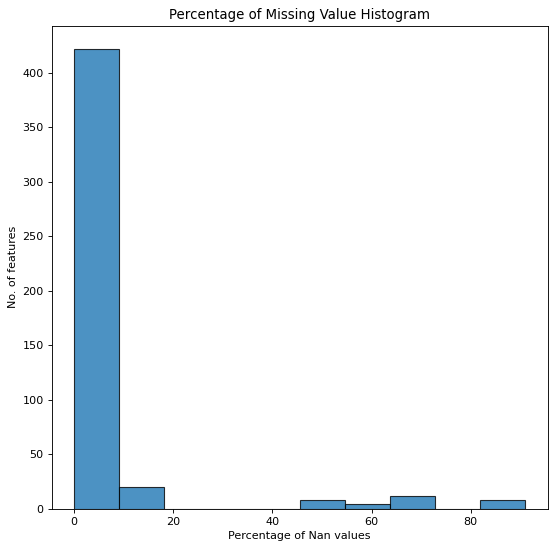

In [36]:
# Missing Value histogram
nan_perc = pd.DataFrame(round((X_train.isnull().sum() * 100/ len(X_train)),2))
nan_perc = nan_perc.reset_index()
nan_perc = nan_perc.rename({'index': 'feature', 0: 'percentage'}, axis=1)

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':80})
n,bins,patch = plt.hist(nan_perc['percentage'],bins=10, alpha=0.8, label='Value', edgecolor='black', linewidth=1)
plt.gca().set(title='Percentage of Missing Value Histogram', ylabel='No. of features', xlabel='Percentage of Nan values')
plt.show()

In [37]:
# Defining a threshold to remove the values above it
threshold= 0.7
pct_null = X_train.isnull().sum() / len(X_train)
missing_value_cols = pct_null[pct_null >= threshold].index

# number of features containing more than 55% missing values
print(len(missing_value_cols))
print(missing_value_cols)

X_train = X_train.drop(missing_value_cols, axis=1)

8
Index(['feature086', 'feature158', 'feature159', 'feature221', 'feature293',
       'feature294', 'feature359', 'feature493'],
      dtype='object')


#### 4.2.5. Less volatile

In [38]:
# Exploring  remaining features
summary = X_train.iloc[:,:].describe(include='all')

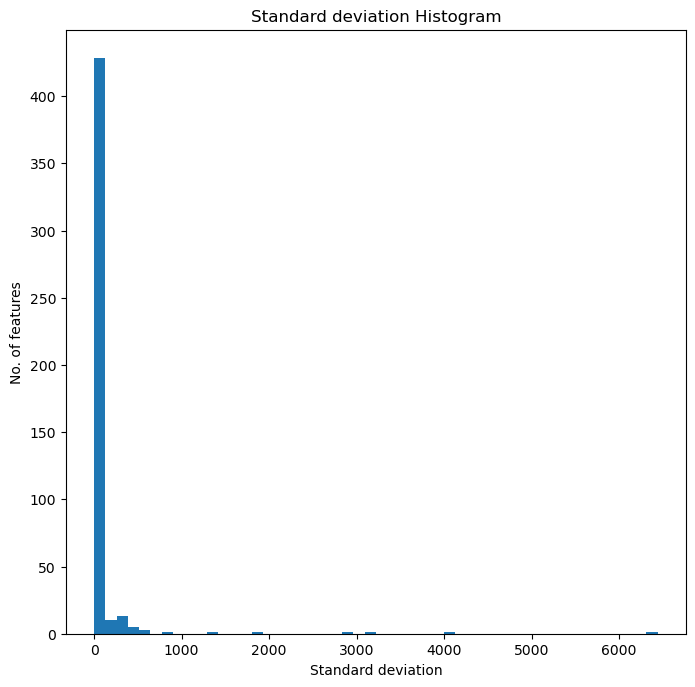

In [39]:
# Checking std of remaining features

def StandardDeviation(df):
    import matplotlib.pyplot as plt

    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std(), bins = 50)
    plt.gca().set(title='Standard deviation Histogram', ylabel='No. of features', xlabel='Standard deviation');
    plt.show()
    
StandardDeviation(X_train)

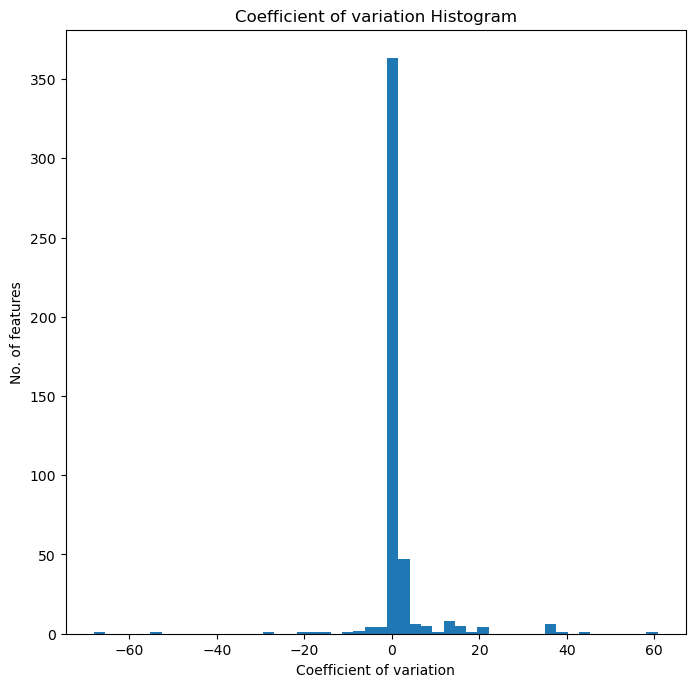

In [40]:
# Checking coeff std of remaining features
def CoefficientOfVariation(df):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std()/df.mean(), bins = 50)
    plt.gca().set(title='Coefficient of variation Histogram', ylabel='No. of features', xlabel='Coefficient of variation');
    plt.show()

CoefficientOfVariation(X_train)

<AxesSubplot:>

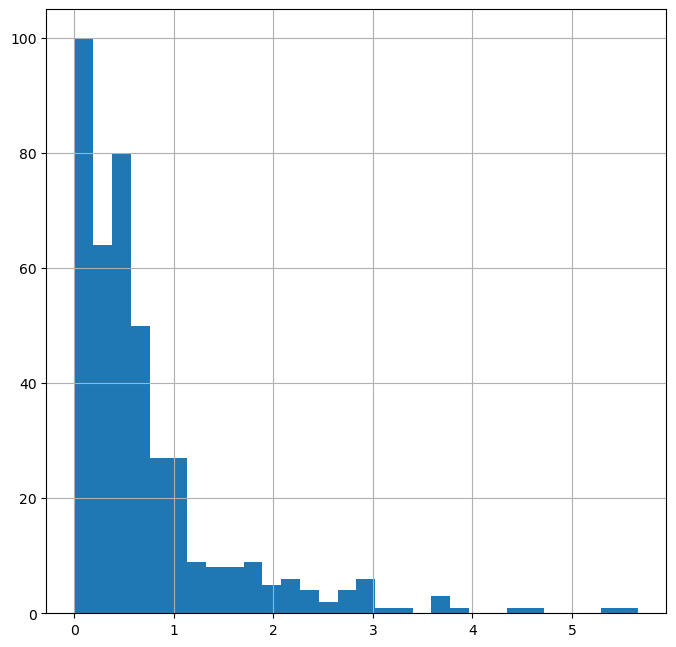

In [41]:
# histogram of the coefficient standard deviation of a percentage of features with the least coeffstd
feature_coeffstd = pd.DataFrame(summary.loc['std',:]/abs(summary.loc['mean',:])).sort_values(by=[0])
percentage_features = int(len(feature_coeffstd)*90/100)
feature_coeffstd.iloc[0:percentage_features,0].hist(bins=30)

In [42]:
# a percentage of features with the least coeffstd to remove
percentageToAnalyze = 0

percentage_features_rm = int(len(feature_coeffstd)*percentageToAnalyze/100)
feature_index = feature_coeffstd.index
features_least_volatile = feature_index[0:percentage_features_rm]
print("Number of least Volatiles", len(features_least_volatile))
print(features_least_volatile)

Number of least Volatiles 0
Index([], dtype='object')


In [43]:
# dropping a percentage of features with the least coeffstd
X_train.drop(features_least_volatile, axis = 1, inplace = True)

In [44]:
X_train

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
240.0,3061.98,2344.91,2197.2667,911.2054,1.3257,104.1722,0.1208,1.3595,0.0063,-0.0034,...,0.0052,78.5378,0.4915,0.0114,0.0031,2.3265,0.0235,0.0184,0.0052,78.5378
183.0,2928.03,2497.03,2221.9444,1551.6947,1.5296,99.2678,0.1222,1.4494,-0.0013,0.0042,...,0.0081,264.7525,0.5005,0.0203,0.0052,4.0460,0.0077,0.0204,0.0081,264.7525
971.0,3066.18,2539.01,2180.5556,1165.1351,0.7892,101.4578,0.1226,1.4454,0.0177,0.0017,...,0.0053,71.0108,0.4999,0.0174,0.0046,3.4860,0.0223,0.0159,0.0053,71.0108
193.0,2956.64,2436.12,2139.2667,1123.3450,1.3699,102.2522,0.1254,1.3840,-0.0150,0.0095,...,NaN,NaN,0.4948,0.0149,0.0036,3.0214,0.0112,0.0191,0.0058,170.4645
1240.0,2937.77,2532.30,2198.8556,1031.1917,1.3204,102.7622,0.1235,1.4294,0.0138,0.0052,...,NaN,NaN,0.5019,0.0146,0.0039,2.8997,0.0193,0.0072,0.0026,37.6251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041.0,3021.61,2440.29,2227.2222,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,...,NaN,NaN,0.5091,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
128.0,3100.44,2690.99,2239.4223,1997.3782,1.5397,98.3356,0.1229,1.5430,0.0059,-0.0057,...,NaN,NaN,0.4998,0.0162,0.0034,3.2350,0.0201,0.0379,0.0118,188.2987
431.0,2956.84,2592.29,2217.3777,1425.1041,1.7585,106.2556,0.1200,1.5383,-0.0268,-0.0010,...,NaN,NaN,0.5009,0.0124,0.0035,2.4736,0.0142,0.0156,0.0044,109.5996


### 4.3 Outlier Identification

In [45]:
# Funtion for Outlier treatment
def Outlier(X, outlier_treatment) :
    
    if outlier_treatment == 'NaN' :
        # calculating the z score of the values
        z_train= pd.DataFrame(stats.zscore(X,nan_policy='omit'))
        z_train

        # calculating the number of outliers
        print('Number of Outliers : ',sum(z_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))

        #Outlier treatment : replacing outliers with NA to impute all NA values
        is_outlier = abs(z_train)>3
        is_outlier.columns = X.columns
        is_outlier.index = X.index
        return(X.mask(is_outlier, np.nan))
    
    elif outlier_treatment == '3s':
        boundary = 3
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
        X = X.apply(lambda x : [y if y < boundary or np.isnan(y) else boundary for y in x])
        X = X.apply(lambda x : [y if y > -1*boundary or np.isnan(y) else -1*boundary for y in x])
        
        # for inverse transformation
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        X_inverse.columns = X.columns
        return(X_inverse)




In [46]:
# Outlier treatment with NA values
X_train = Outlier(X_train, 'NaN')

Number of Outliers :  4873


In [47]:
#X_train = Outlier(X_train, '3s')

### 4.4 Missing value Imputation

In [48]:
# function for imputing missing values
def MissingValueImputation(X, Imputer) :
    
    if Imputer == 'KNN' :
        
        #Scaling
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
        
        #define imputer
        KNN_imputer = KNNImputer(n_neighbors=10, weights = 'uniform')

        #fit on the dataset
        X = KNN_imputer.fit_transform(X)
        
        #Inverse tranform of scaling
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        return(X_inverse)
        
    elif Imputer == 'MICE' :
        
        #define imputer
        MICE_imputer = IterativeImputer(max_iter=20, sample_posterior=False, random_state=100)
        
        #fit dataset
        return(MICE_imputer.fit_transform(X))

#### 4.4.1. KNN

In [49]:
# impute using knn
X_train_KNN = X_train.copy(deep=True)
X_train_KNN.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'KNN'))

In [50]:
X_train_KNN.isna().sum().sum()

0

#### 4.4.2. MICE

In [51]:
# impute using mice
X_train_MICE = X_train.copy(deep=True)
X_train_MICE.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'MICE'))

In [52]:
X_train_MICE.isna().sum().sum()

0

### 4.5. Evaluation of imputation

#### 4.5.1 Density plots

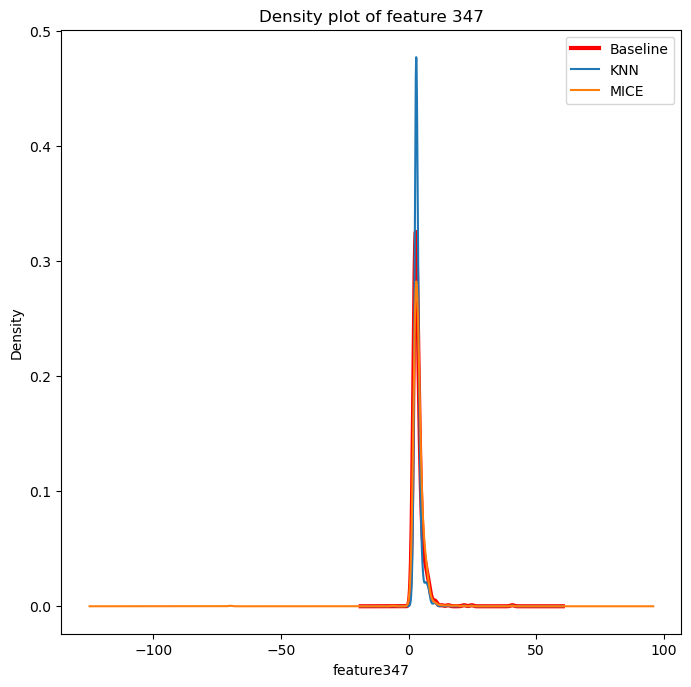

In [53]:
# Visualization of a variable with most missing values

X_train['feature347'].plot(kind='kde',c='red',linewidth=3)
X_train_KNN['feature347'].plot(kind='kde')
X_train_MICE['feature347'].plot(kind='kde')
labels = ['Baseline', 'KNN','MICE']
plt.legend(labels)
plt.xlabel('feature347')
plt.gca().set(title='Density plot of feature 347');

80


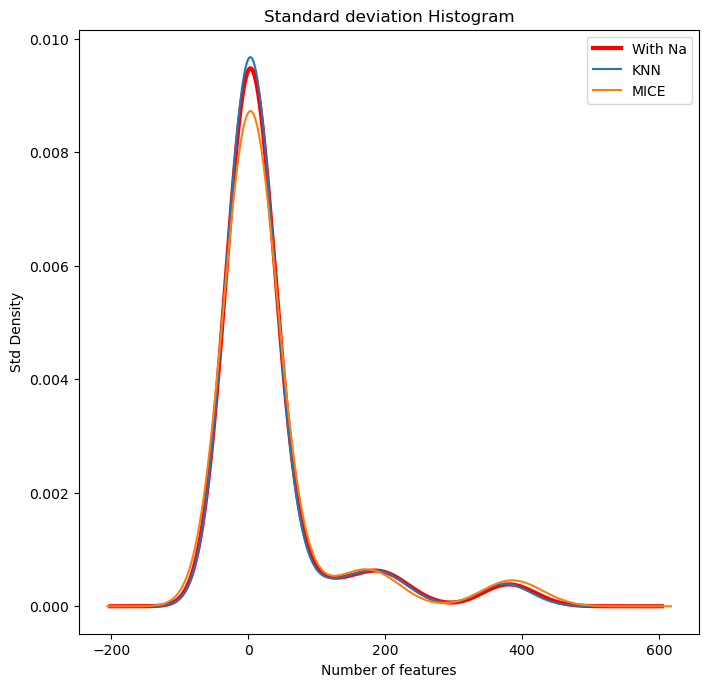

In [54]:
# plot the std of the features with more than 3% of missing values before and after imputation with knn and mice
feature_missing_sum = pd.DataFrame((X_train.isna()).sum())
percentage_missing_filter = 3/100
feature_filter = feature_missing_sum[feature_missing_sum[0]>=(len(X_train.loc[:,])*percentage_missing_filter)].index

print(len(feature_filter))

summary_with_na = X_train[feature_filter].describe(include='all')
feature_std_with_na = pd.DataFrame(summary_with_na.loc['std',:])
feature_std_sort_with_na = feature_std_with_na.sort_values(by=['std'])

summary_knn = X_train_KNN[feature_filter].describe(include='all')
feature_std_knn = pd.DataFrame(summary_knn.loc['std',:])
feature_std_sort_knn = feature_std_knn.sort_values(by=['std'])

summary_mice = X_train_MICE[feature_filter].describe(include='all')
feature_std_mice = pd.DataFrame(summary_mice.loc['std',:])
feature_std_sort_mice = feature_std_mice.sort_values(by=['std'])

feature_std_sort_with_na.iloc[:,0].plot(kind='kde',c='red',linewidth=3)
feature_std_sort_knn.iloc[:,0].plot(kind='kde')
feature_std_sort_mice.iloc[:,0].plot(kind='kde')
labels = ['With Na', 'KNN','MICE']
plt.legend(labels)
plt.gca().set(title='Standard deviation Histogram', ylabel='Std Density', xlabel='Number of features');

## 4.6. Feature Selection

### 4.6.1 Boruta

In [55]:
#Boruta function

def BorutaFeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    # define random forest classifier
    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=100)
    model.fit(X, y)
    
    # define Boruta feature selection method
    feature_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=100, max_iter=200)

    # find all relevant features
    feature_selector.fit(X.to_numpy(),y)

    # check selected features
    feature_selector.support_

    # check ranking of features
    feature_selector.ranking_

    # zip feature names, ranks, and decisions 
    feature_ranks = list(zip(feature_names, 
                             feature_selector.ranking_, 
                             feature_selector.support_))

    # print the results
    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features = list()
    indexes = np.where(feature_selector.support_ == True)
    for x in np.nditer(indexes):
        final_features.append(feature_names[x])
    print(final_features)
    
 # call transform() on X to filter it down to selected features
    return pd.DataFrame(X.filter(final_features)) , final_features



In [56]:
# apply Boruta and store selected features in the variable
X_train , final_features = BorutaFeatureSelection(X_train_MICE,y_train)

Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	466
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	0
Tentative: 	28
Rejected: 	438
Iteration: 	9 / 200
Confirmed: 	0
Tentative: 	28
Rejected: 	438
Iteration: 	10 / 200
Confirmed: 	1
Tentative: 	27
Rejected: 	438
Iteration: 	11 / 200
Confirmed: 	1
Tentative: 	27
Rejected: 	438
Iteration: 	12 / 200
Confirmed: 	3
Tentative: 	25
Rejected: 	438
Iteration: 	13 / 200
Confirmed: 	3
Tentative: 	25
Rejected: 	438
Iteration: 	14 / 200
Confirmed: 	3
Tentative: 	25
Rejected: 	438
Iteration: 	15 / 200
Confirmed: 	3
Tentative: 	25
Rejected: 	438
Iteration: 	16 / 200
Confirmed: 	3
Tentat

### 4.6.2 Overview of remaining features


In [57]:
# Descriptive statistics
X_train.describe()

,feature034,feature060,feature065,feature066,feature103,feature104,feature112,feature122,feature125,feature130,feature131,feature153,feature248,feature288,feature426,feature461,feature478,feature519,feature520,feature574
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,8.826481,2.819657,20.517941,26.874099,0.000637,-0.009812,231.847741,15.798943,15.796003,-0.559285,0.746599,0.615331,0.047026,0.183804,6.298992,28.985510,5.639907,1.583376,10.059669,0.312544
std,0.404115,8.176921,4.993771,6.427241,0.057171,0.002834,1.250945,0.098656,0.115282,1.218536,0.080880,0.539376,0.036756,0.166135,5.526954,12.259187,3.211522,0.361218,7.862429,0.134783
min,7.603200,-19.992700,6.448200,1.422072,-0.167200,-0.018500,228.838879,15.500000,15.468318,-3.779000,0.501300,0.154400,0.000000,0.058800,1.466600,7.953400,-70.951922,-4.163575,0.000000,0.043187
25%,8.580100,-1.870900,17.365500,22.983200,-0.035900,-0.011800,231.217733,15.730000,15.730000,-0.898800,0.688700,0.374000,0.025100,0.114800,3.774800,19.977300,4.113700,1.528301,5.439900,0.236300
50%,8.769600,1.002700,20.023600,26.217500,0.000000,-0.010100,231.806002,15.790000,15.780000,-0.141900,0.759100,0.467500,0.042922,0.139100,4.778100,26.152600,5.258700,1.585430,9.315800,0.290800
75%,9.035500,4.428200,22.855500,29.981500,0.031500,-0.008200,232.260475,15.870000,15.880000,0.047300,0.816200,0.697500,0.051716,0.199810,6.958700,35.669700,6.701100,1.652800,10.889781,0.361300
max,10.963400,29.750900,49.299598,103.608788,0.188800,-0.000700,236.954600,16.070000,16.100000,2.458000,0.888400,6.278200,0.251560,1.920200,67.682973,88.424878,23.100200,4.517100,55.165100,1.109300


In [58]:
#datatype and shape
print(X_train.info())
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1253 entries, 240.0 to 1364.0
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature034  1253 non-null   float64
 1   feature060  1253 non-null   float64
 2   feature065  1253 non-null   float64
 3   feature066  1253 non-null   float64
 4   feature103  1253 non-null   float64
 5   feature104  1253 non-null   float64
 6   feature112  1253 non-null   float64
 7   feature122  1253 non-null   float64
 8   feature125  1253 non-null   float64
 9   feature130  1253 non-null   float64
 10  feature131  1253 non-null   float64
 11  feature153  1253 non-null   float64
 12  feature248  1253 non-null   float64
 13  feature288  1253 non-null   float64
 14  feature426  1253 non-null   float64
 15  feature461  1253 non-null   float64
 16  feature478  1253 non-null   float64
 17  feature519  1253 non-null   float64
 18  feature520  1253 non-null   float64
 19  feature574  1253 no

array([[<AxesSubplot:title={'center':'feature034'}>,
        <AxesSubplot:title={'center':'feature060'}>,
        <AxesSubplot:title={'center':'feature065'}>,
        <AxesSubplot:title={'center':'feature066'}>],
       [<AxesSubplot:title={'center':'feature103'}>,
        <AxesSubplot:title={'center':'feature104'}>,
        <AxesSubplot:title={'center':'feature112'}>,
        <AxesSubplot:title={'center':'feature122'}>],
       [<AxesSubplot:title={'center':'feature125'}>,
        <AxesSubplot:title={'center':'feature130'}>,
        <AxesSubplot:title={'center':'feature131'}>,
        <AxesSubplot:title={'center':'feature153'}>],
       [<AxesSubplot:title={'center':'feature248'}>,
        <AxesSubplot:title={'center':'feature288'}>,
        <AxesSubplot:title={'center':'feature426'}>,
        <AxesSubplot:title={'center':'feature461'}>],
       [<AxesSubplot:title={'center':'feature478'}>,
        <AxesSubplot:title={'center':'feature519'}>,
        <AxesSubplot:title={'center':'feat

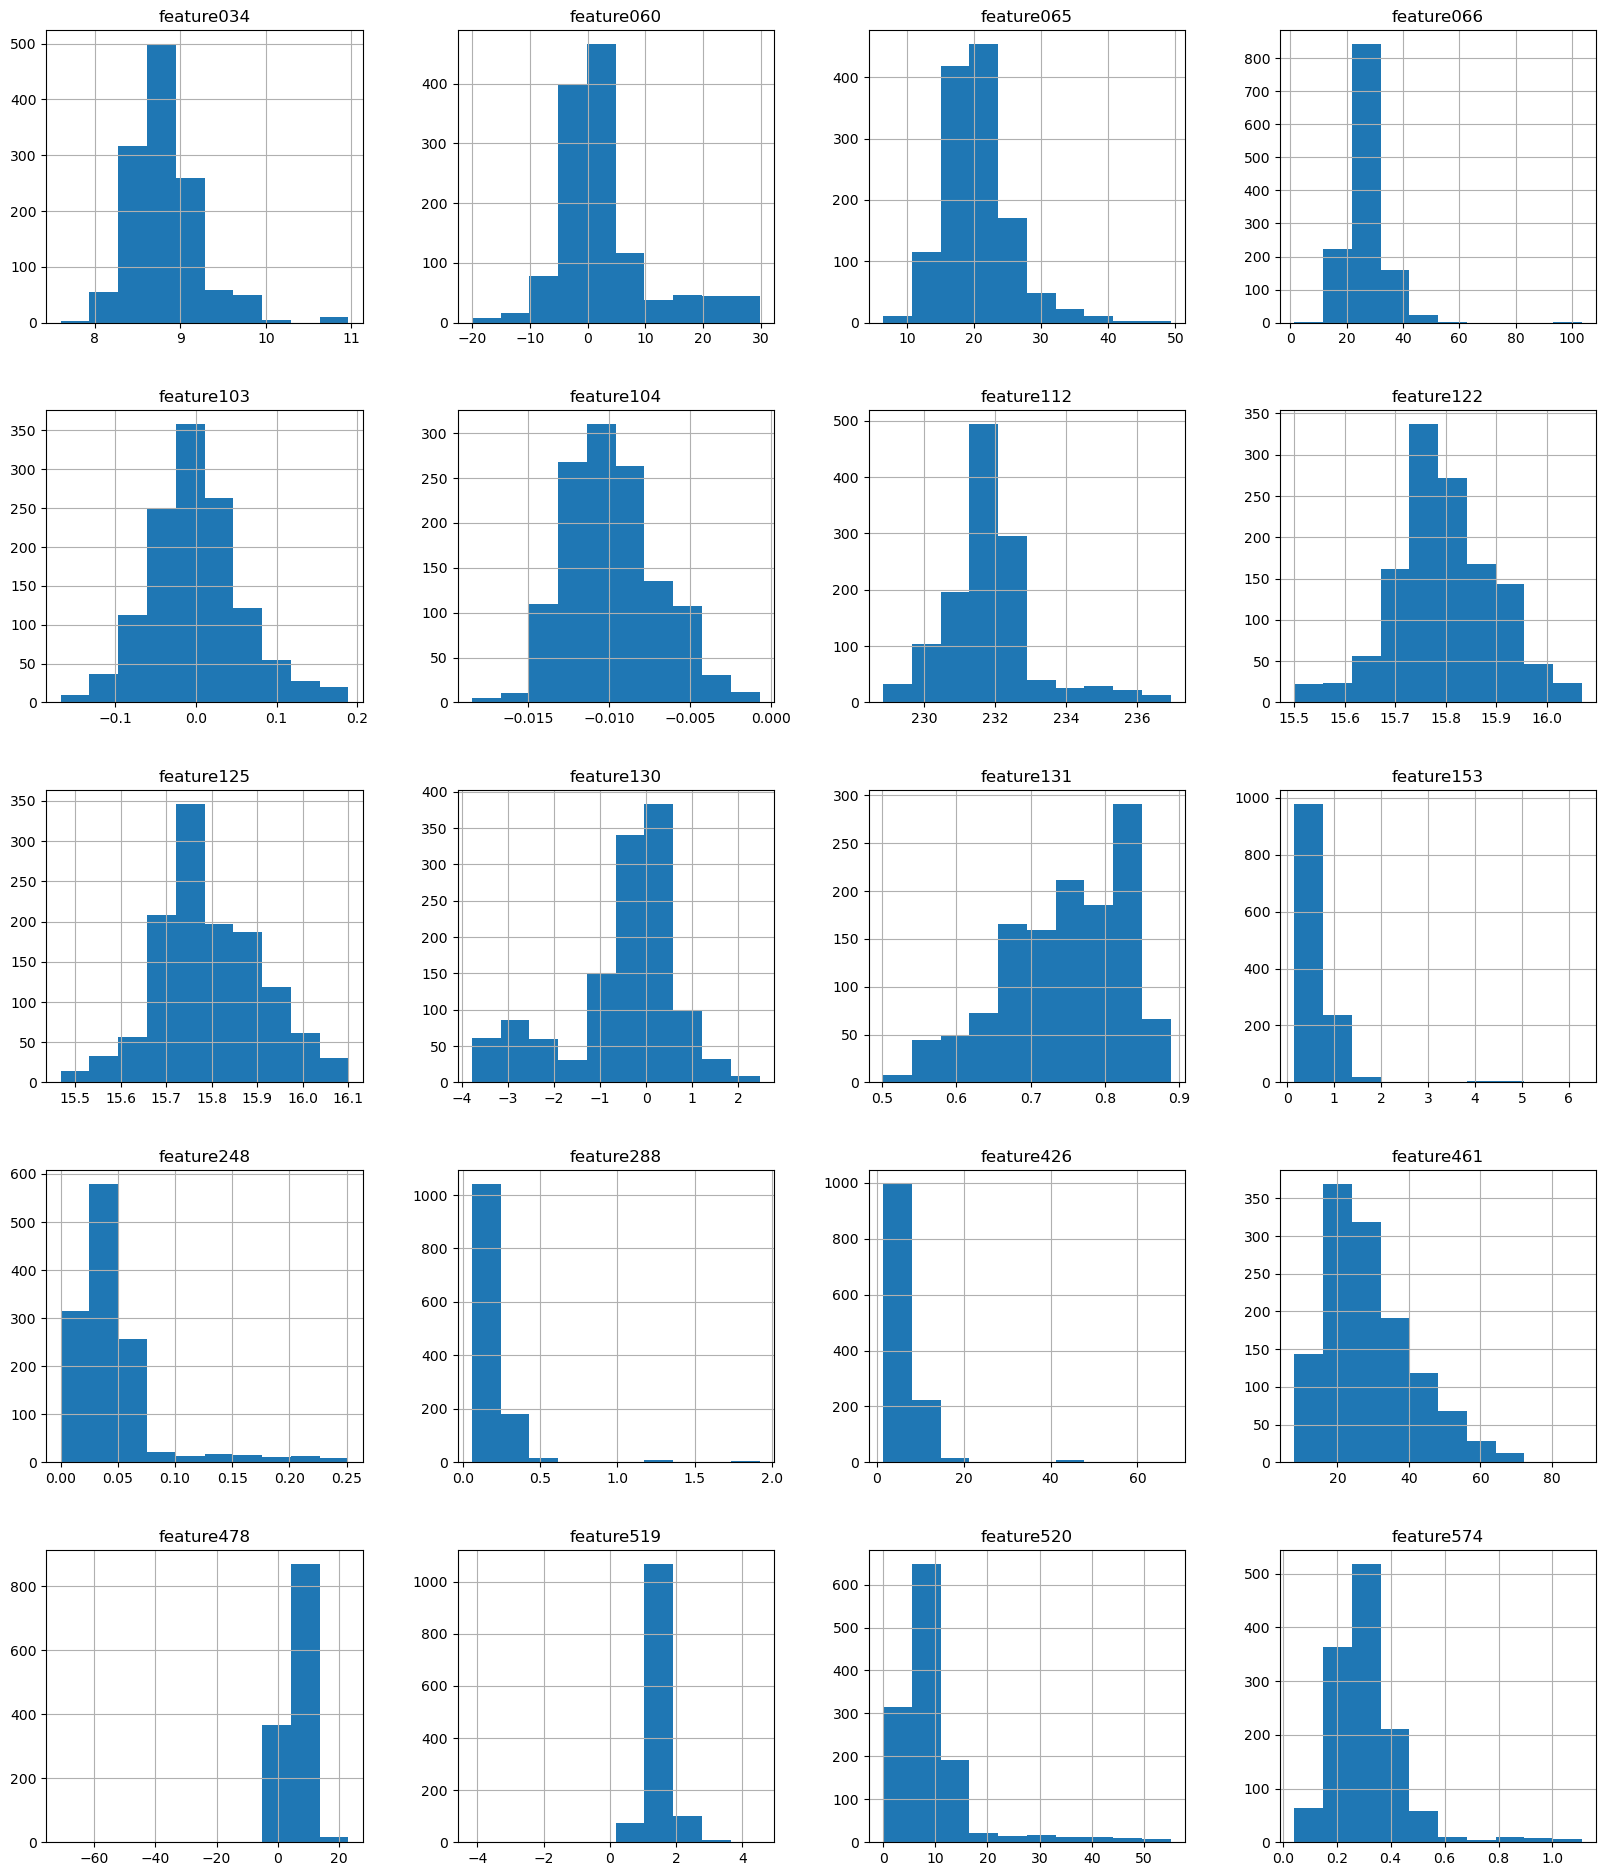

In [59]:
# Histogram of the features
X_train.hist(figsize=(20,24))

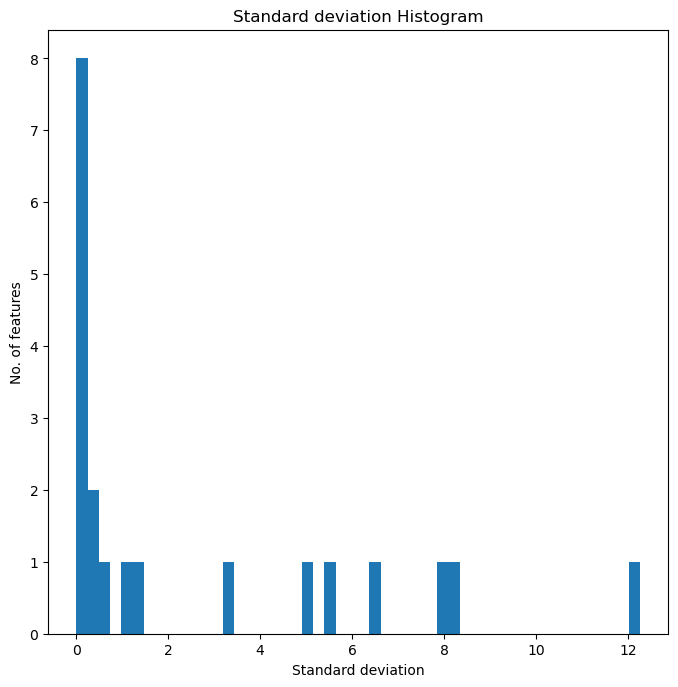

In [60]:
# Histogram of Standard Deviation of the remaining features
StandardDeviation(X_train)

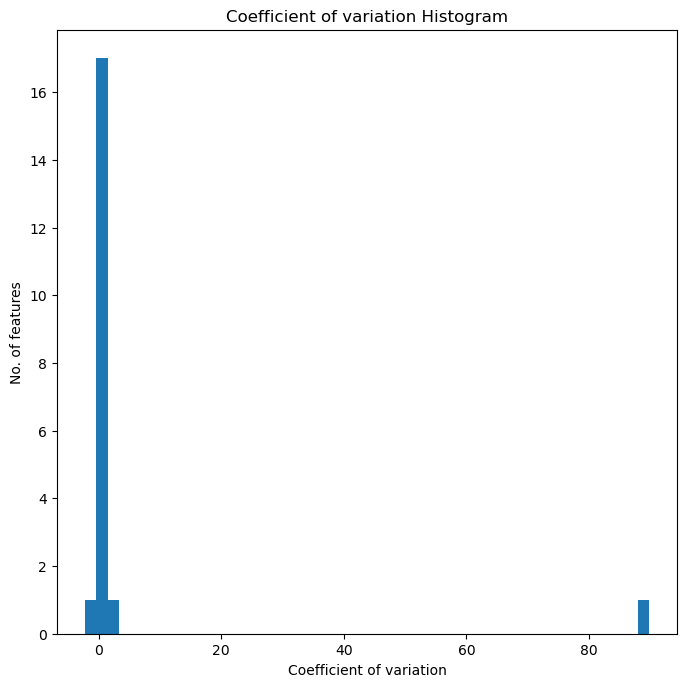

In [61]:
# Histogram of Coefficient of Standard Deviation of the remaining features
CoefficientOfVariation(X_train)

In [62]:
# Correlation of the remaining features

# Heatmap of correlation
corr = pd.DataFrame(X_train.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,feature034,feature060,feature065,feature066,feature103,feature104,feature112,feature122,feature125,feature130,feature131,feature153,feature248,feature288,feature426,feature461,feature478,feature519,feature520,feature574
feature034,1.00,0.15,0.10,0.10,0.03,0.14,0.01,0.02,0.06,0.10,0.02,0.01,0.09,0.00,0.00,0.10,0.07,-0.01,0.09,0.04
feature060,0.15,1.00,-0.45,-0.39,0.04,0.34,-0.01,0.03,0.10,0.22,0.03,0.17,0.23,0.17,0.16,0.07,0.18,0.10,0.23,0.01
feature065,0.10,-0.45,1.00,0.90,-0.06,0.15,0.04,-0.08,-0.08,-0.03,0.01,-0.02,0.08,-0.02,-0.02,0.06,-0.09,-0.07,0.08,0.05
feature066,0.10,-0.39,0.90,1.00,-0.05,0.16,0.06,-0.08,-0.07,0.00,0.01,-0.02,0.12,-0.02,-0.02,0.02,-0.23,-0.18,0.10,0.03
feature103,0.03,0.04,-0.06,-0.05,1.00,0.04,0.01,0.03,0.01,0.04,0.09,-0.01,0.00,-0.01,-0.01,-0.03,-0.05,0.02,-0.00,0.07
feature104,0.14,0.34,0.15,0.16,0.04,1.00,-0.02,0.04,0.14,0.30,0.06,0.09,0.25,0.09,0.09,0.06,0.09,0.04,0.25,-0.02
feature112,0.01,-0.01,0.04,0.06,0.01,-0.02,1.00,-0.21,-0.11,0.19,-0.11,-0.03,0.07,-0.03,-0.03,0.02,0.05,-0.10,0.06,0.01
feature122,0.02,0.03,-0.08,-0.08,0.03,0.04,-0.21,1.00,0.91,0.03,0.25,0.09,-0.02,0.08,0.09,-0.00,0.02,-0.06,-0.01,-0.05
feature125,0.06,0.10,-0.08,-0.07,0.01,0.14,-0.11,0.91,1.00,0.20,0.14,0.11,0.03,0.10,0.12,0.03,0.07,-0.05,0.03,-0.04
feature130,0.10,0.22,-0.03,0.00,0.04,0.30,0.19,0.03,0.20,1.00,0.24,0.06,0.15,0.06,0.06,-0.01,0.12,-0.01,0.15,0.00


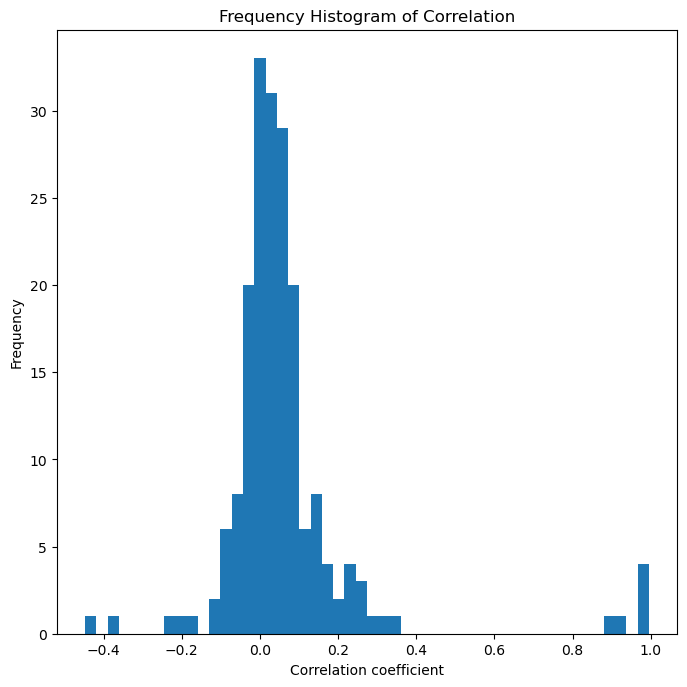

In [63]:
# Histogram of the Correlation of the remaining features
correlation(X_train)

## 5. Modeling

### 5.1. Balancing

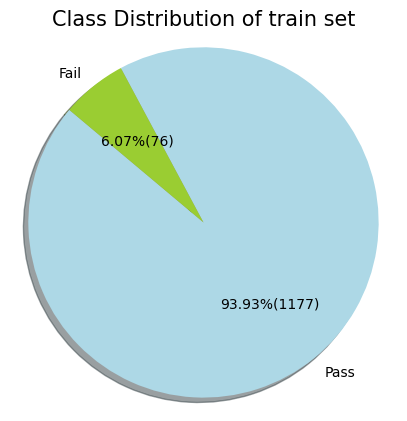

In [64]:
#Pie chart of the imbalanced train data
ClassDistributionGraph(y_train, 'Class Distribution of train set')

### 5.1.1 Sampling Function

In [65]:
# Sampling using SMOTE

def Sampling(X_train, y_train, sampler):

    #SMOTE
    if sampler == 'SMOTE':
        sampler = SMOTE(sampling_strategy ='minority', random_state=100)    
    
    #ROSE
    if sampler == 'ROSE':
        sampler = RandomOverSampler(random_state=100)

    #ADASYN
    if sampler == 'ADASYN':
        sampler = ADASYN(random_state=100)
    

    #SMOTTEENN
    if sampler == 'SMOTEENN' :
        sampler = SMOTEENN(random_state=100)
        
    #SMOTETomek
    if sampler == 'SMOTETomek':
        from imblearn.combine import SMOTETomek 
        sampler = SMOTETomek(random_state=100)
        
    #BorderlineSMOTE
    if sampler == 'BorderlineSMOTE':
        from imblearn.over_sampling import BorderlineSMOTE 
        sampler = BorderlineSMOTE(random_state=100)

    if sampler == "randomunder":
        from imblearn.under_sampling import RandomUnderSampler
        sampler = RandomUnderSampler(random_state=100)

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    counter = Counter(y_resampled)
    print(counter)
    return X_resampled, y_resampled





### 5.1.2. SMOTEENN

In [66]:
# SMOTEENN Imbalance treatment
X_resampled, y_resampled = Sampling(X_train, y_train,'SMOTEENN')

Counter({'FAIL': 1116, 'PASS': 826})


In [67]:
 X_train

,feature034,feature060,feature065,feature066,feature103,feature104,feature112,feature122,feature125,feature130,feature131,feature153,feature248,feature288,feature426,feature461,feature478,feature519,feature520,feature574
ID,,,,,,,,,,,,,,,,,,,,
240.0,9.2171,0.7218,19.278200,23.4212,-0.0254,-0.0103,231.825547,15.84,15.90,-0.5677,0.7025,0.4290,0.044300,0.1285,4.0033,40.9542,4.1323,1.587515,9.622900,0.3004
183.0,9.0998,27.4136,12.586400,19.9389,0.1128,-0.0048,230.992993,15.73,15.77,0.0000,0.8764,0.2277,0.034300,0.0762,2.3027,25.0134,10.0883,1.627332,7.381300,0.3660
971.0,8.6068,7.0300,12.970000,17.1419,0.0497,-0.0125,233.392310,15.84,15.82,-2.6470,0.8349,0.4182,0.052300,0.1194,4.2236,18.6454,6.4358,1.630702,11.289400,0.3689
193.0,9.2362,2.0427,37.940625,48.6919,0.0591,-0.0055,231.635626,15.72,15.72,-0.1892,0.7138,0.3870,0.080500,0.1167,3.8325,32.8168,8.6072,1.655808,17.481200,0.4321
1240.0,9.1141,0.5536,19.446400,24.5095,0.0095,-0.0085,229.672000,15.93,15.98,-0.1419,0.7284,0.3080,0.020600,0.0993,3.0625,26.4448,3.1414,1.681500,4.475400,0.2492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041.0,8.8581,-3.7509,23.750900,30.7593,0.0244,-0.0086,231.502053,15.73,15.71,-3.4490,0.5042,0.9898,0.044277,0.2818,10.5695,21.7993,3.3690,1.579701,9.501027,0.4025
128.0,8.7947,26.6527,13.347300,20.6385,0.0140,-0.0059,231.834423,15.70,15.70,0.3311,0.7636,0.3355,0.025500,0.1249,3.1751,23.3774,8.7660,1.616049,5.442700,0.3008
431.0,8.6439,2.7500,17.250000,23.7232,-0.0259,-0.0088,231.811749,15.87,15.88,-0.9461,0.8244,0.3316,0.017200,0.1169,3.2828,30.8757,3.8384,1.534869,3.744200,0.4582


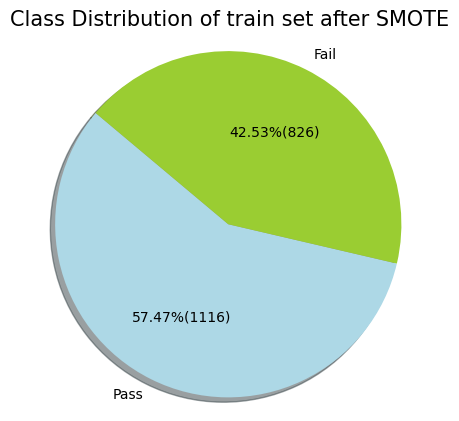

In [68]:
# Pie Chart to visualize balanced data
ClassDistributionGraph(y_resampled, 'Class Distribution of train set after SMOTE')

### 5.2 Preparing Test data

In [69]:
## Rough feature reduction
X_test = X_test_

X_test = X_test.drop(columns = 'timestamp')
X_test = X_test.drop(columns = single_value_columns)
X_test = X_test.drop(columns = missing_value_cols)
X_test = X_test.drop(columns = features_least_volatile)
                    
# Outlier treatment 
X_test = Outlier(X_test,'NaN')





Number of Outliers :  1543


In [70]:
# Missing Value imputation
X_test.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_test,'MICE'))

In [71]:
# Feature selection 
X_test = X_test.filter(final_features)

# View processed test set
X_test


,feature034,feature060,feature065,feature066,feature103,feature104,feature112,feature122,feature125,feature130,feature131,feature153,feature248,feature288,feature426,feature461,feature478,feature519,feature520,feature574
ID,,,,,,,,,,,,,,,,,,,,
364.0,8.8505,3.893600,16.106400,23.305900,0.0300,-0.0126,232.094217,15.79,15.85,0.2365,0.675500,0.808300,0.055500,0.258700,8.91530,31.3297,4.881600,0.595485,11.992400,0.185400
1126.0,8.9818,-1.604500,21.604500,26.756800,-0.0364,-0.0138,230.443000,15.81,15.70,-3.0250,0.809000,0.433900,0.047910,0.134700,4.58470,16.4619,3.803800,0.857700,9.919397,0.300600
1154.0,9.3868,-1.497300,21.497300,23.523200,0.0214,-0.0109,231.708227,15.82,15.77,-2.6470,0.841400,0.509700,0.049600,0.156700,5.13850,27.5028,4.486000,1.950341,10.692300,0.282400
48.0,9.2007,23.137300,16.862700,22.348900,-0.0320,-0.0080,230.509510,15.87,15.90,0.0946,0.748400,0.821913,0.022100,0.257301,8.51422,23.1448,9.493900,5.889336,4.757500,0.579100
1440.0,8.3675,-3.506400,23.506400,29.757400,0.0624,-0.0119,235.112200,15.71,15.73,0.0000,0.656700,0.563400,0.030024,0.167000,5.51650,25.0382,4.967100,1.030300,6.430018,0.261600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450.0,9.3181,0.434500,19.565500,27.458300,-0.0505,-0.0131,232.058500,15.82,15.79,-0.4258,0.688800,0.232400,0.022433,0.081400,2.42350,24.9760,6.046900,2.506700,5.517341,0.116600
996.0,8.2981,-0.769064,18.851423,24.664623,0.0051,-0.0103,232.512400,15.84,15.82,-2.6470,0.834900,0.211500,0.012600,0.067100,2.12650,14.3206,4.932121,1.335200,2.712300,0.291400
103.0,10.9634,20.586400,19.413600,27.364800,0.0333,-0.0069,232.184106,15.69,15.66,0.1419,0.745400,0.969900,0.169800,0.278500,10.19920,20.4190,4.797900,2.409604,36.480700,0.294095


### 5.3. Hypertuning of Parameters

### 5.3.1 Random Forest

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

# Criterion
criterion=['gini', 'entropy']

# Number of features to consider at every split
max_features = ['auto', 'sqrt'] #sqrt better

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 200, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,3,5] # 2 better (1not checked)

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4] # 1  better

# Method of selecting samples for training each tree
bootstrap = [True, False] #False better

#class-weight
class_weight = ["balanced", "balanced_subsample"]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'class_weight': class_weight}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'class_weight': ['balanced', 'balanced_subsample']}


In [73]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=100)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='recall', n_iter = 100, cv = 5, verbose=2, random_state=100, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [1, 20, 40, 60, 80, 100,
                                                      120, 140, 160, 180, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
 

In [74]:
# Printing the best Parameters and best estimator

rf_random.best_params_

rf_random.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=180,
                       min_samples_split=5, n_estimators=2000,
                       random_state=100)

In [75]:
# View the results based on f1_score ranking
results_rf = pd.DataFrame(rf_random.cv_results_)
results_rf_sorted = results_rf.sort_values('rank_test_score', ascending='True')
pd.DataFrame(results_rf_sorted)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_class_weight,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,30.825262,0.252113,0.982799,0.016813,2000,5,1,auto,180,balanced,True,"{'n_estimators': 2000, 'min_samples_split': 5,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
72,23.538706,0.424425,0.711742,0.047174,2000,5,1,sqrt,60,balanced,True,"{'n_estimators': 2000, 'min_samples_split': 5,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
71,31.364099,0.585192,0.660738,0.014824,1788,2,1,sqrt,180,balanced_subsample,False,"{'n_estimators': 1788, 'min_samples_split': 2,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
70,23.036171,0.330646,0.529646,0.061850,1366,5,2,sqrt,140,balanced_subsample,False,"{'n_estimators': 1366, 'min_samples_split': 5,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
69,24.852597,0.242797,0.603998,0.028944,1577,3,4,auto,180,balanced,False,"{'n_estimators': 1577, 'min_samples_split': 3,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,4.167484,0.115701,0.118683,0.003568,311,3,1,auto,140,balanced_subsample,True,"{'n_estimators': 311, 'min_samples_split': 3, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,96
27,23.574401,0.306756,0.510261,0.016599,1366,3,1,auto,60,balanced,False,"{'n_estimators': 1366, 'min_samples_split': 3,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,97
26,12.336442,0.160317,0.393944,0.009405,1155,3,4,auto,40,balanced,True,"{'n_estimators': 1155, 'min_samples_split': 3,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,98
36,35.670648,0.531711,0.727537,0.022617,2000,3,2,sqrt,160,balanced_subsample,False,"{'n_estimators': 2000, 'min_samples_split': 3,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,99


### 5.3.2 XGBoost

In [76]:
# A parameter grid for XGBoost

params = {
    "learning_rate"    : [ 0.10, 0.20, 0.3] ,
    "max_depth"        : [ 12, 14, 15, 20],
    "min_child_weight" : [ 0.5, 1, 2 ],
    "gamma"            : [ 0.001, 0.01 ],
    "colsample_bytree" : [ 0.5, 0.7]
}

In [77]:
#XGBClassifier
xgb = XGBClassifier(random_state=100, verbosity=0)

# Grid Search to find the best parameters
xgb_search = GridSearchCV(xgb, param_grid=params, scoring='recall', cv=3, verbose=1)

#Fit the model
xgb_search.fit(X_resampled, y_resampled)





Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=100,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, 

In [78]:
# View the results based on f1_score ranking
results = pd.DataFrame(xgb_search.cv_results_)
results_sorted = results.sort_values('rank_test_score', ascending='True')
pd.DataFrame(results_sorted)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.377198,0.023247,0.014059,0.004334,0.5,0.001,0.1,12,0.5,"{'colsample_bytree': 0.5, 'gamma': 0.001, 'lea...",NaN,NaN,NaN,NaN,NaN,1
92,0.227641,0.004754,0.010041,0.000013,0.7,0.001,0.2,15,2,"{'colsample_bytree': 0.7, 'gamma': 0.001, 'lea...",NaN,NaN,NaN,NaN,NaN,2
93,0.298121,0.009321,0.010046,0.000007,0.7,0.001,0.2,20,0.5,"{'colsample_bytree': 0.7, 'gamma': 0.001, 'lea...",NaN,NaN,NaN,NaN,NaN,3
94,0.257077,0.004345,0.010049,0.000008,0.7,0.001,0.2,20,1,"{'colsample_bytree': 0.7, 'gamma': 0.001, 'lea...",NaN,NaN,NaN,NaN,NaN,4
95,0.228309,0.003731,0.012720,0.003774,0.7,0.001,0.2,20,2,"{'colsample_bytree': 0.7, 'gamma': 0.001, 'lea...",NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.240495,0.007272,0.010033,0.000003,0.5,0.01,0.2,12,1,"{'colsample_bytree': 0.5, 'gamma': 0.01, 'lear...",NaN,NaN,NaN,NaN,NaN,140
50,0.215593,0.012786,0.010046,0.000010,0.5,0.01,0.2,12,2,"{'colsample_bytree': 0.5, 'gamma': 0.01, 'lear...",NaN,NaN,NaN,NaN,NaN,141
51,0.274534,0.003362,0.010043,0.000006,0.5,0.01,0.2,14,0.5,"{'colsample_bytree': 0.5, 'gamma': 0.01, 'lear...",NaN,NaN,NaN,NaN,NaN,142
142,0.217503,0.004676,0.010163,0.000169,0.7,0.01,0.3,20,1,"{'colsample_bytree': 0.7, 'gamma': 0.01, 'lear...",NaN,NaN,NaN,NaN,NaN,143


In [79]:
#Printing the best estimator

print('\n Best estimator:')
print(xgb_search.best_estimator_)

print('\n Best hyperparameters:')
print(xgb_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.001, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=0.5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

 Best hyperparameters:
{'colsample_bytree': 0.5, 'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 0.5}


## 6. Model Evaluation 

### Function

In [80]:
# fucntion to build , predit and assess the model
def run_ML_process(X, y, X_test, y_test, clf):
    
    #-------------------------------- ACCURACY --------------------------------------#
    
    #Evaluation using Startified K Fold cross validation
    cv = StratifiedKFold(n_splits=10)
    scores = cross_val_score(clf, X, y, cv=cv, scoring = 'accuracy')
    print('Averace Train Accuracy:', scores.mean())

    #fit
    clf.fit(X, y)
    
    #predict
    y_pred_test = clf.predict(X_test)
    
    # View accuracy score
    print('Test Accuracy : ', accuracy_score(y_test, y_pred_test))
    
    #--------------------------- CONFUSION MATRIX -----------------------------------#
    
    #Plot confussion matrix
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.title("Test Confusion Matrix")
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
    
    # View the classification report for test data and predictions
    print(classification_report(y_test, y_pred_test))
    
    
    #----------------------------------- COST ----------------------------------------#
    
    con_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
    cost_matrix = pd.DataFrame({0: [0, 1], 1: [20, 0]})
    # Apply element-wise multiplication:
    cost = con_matrix.mul(cost_matrix).to_numpy().sum()
    print("COST: ",cost)

    
    #----------------------------------- ROC ----------------------------------------#
    
    #ROC curve
    plot_roc_curve(clf, X_test, y_test, pos_label="FAIL")
    
    
    #----------------------------------- PR Curve-------------------------------------#
    
    #PR Curve
    plot_precision_recall_curve(clf, X_test, y_test,  pos_label="FAIL")
    
    
    #----------------------------------- Cohens Kappa --------------------------------#
    
    #Cohens kappa
    kappa = cohen_kappa_score(y_pred_test, y_test, weights='quadratic')
    print("Kappa:" , kappa)

### 6.1 Model I : Random Forest (without hypertuning)

Averace Train Accuracy: 0.9675548506476341
Test Accuracy :  0.8757961783439491
              precision    recall  f1-score   support

        FAIL       0.24      0.47      0.32        19
        PASS       0.96      0.90      0.93       295

    accuracy                           0.88       314
   macro avg       0.60      0.69      0.62       314
weighted avg       0.92      0.88      0.89       314

COST:  229
Kappa: 0.25574328430776716


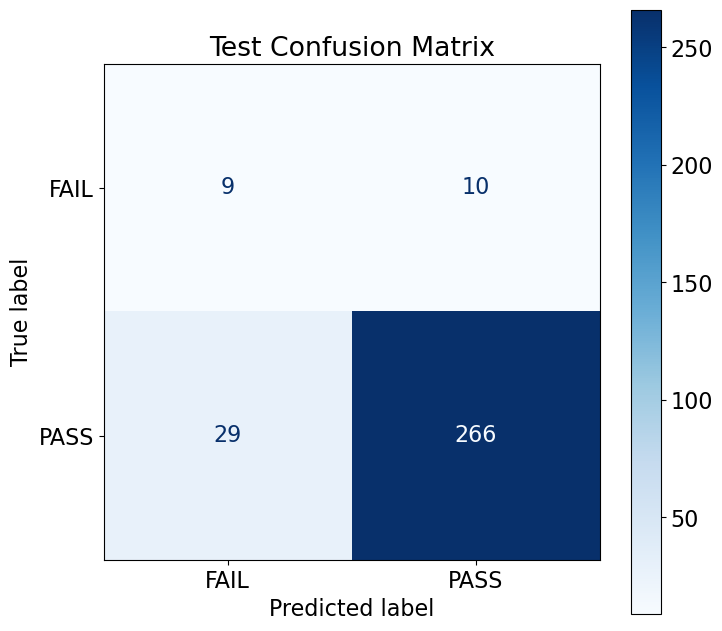

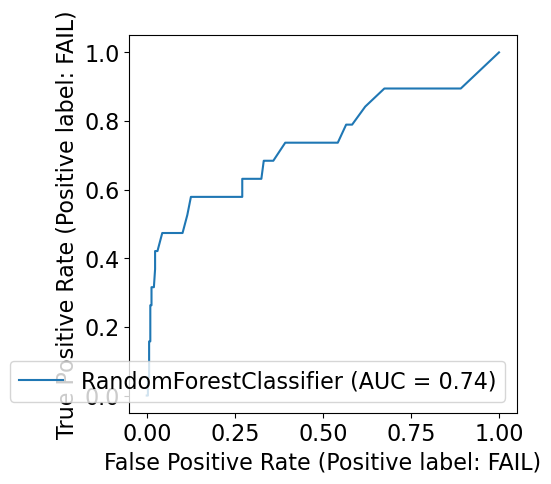

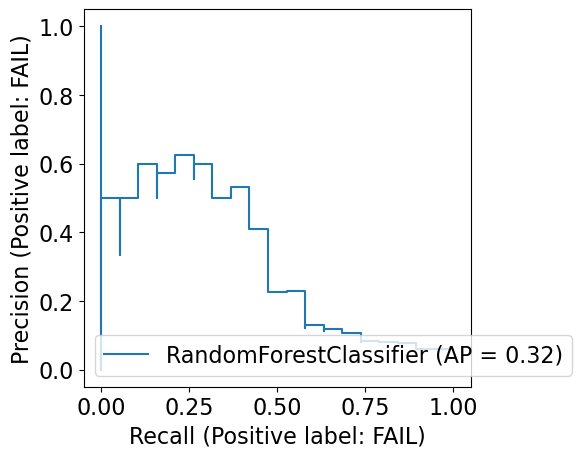

In [81]:
# Random Forest Model
run_ML_process(X_resampled, y_resampled, X_test, y_test, RandomForestClassifier(random_state=100))

### 6.2 Model II : Random Forest (with hypertuning)

Averace Train Accuracy: 0.9691012424002116
Test Accuracy :  0.8885350318471338
              precision    recall  f1-score   support

        FAIL       0.29      0.58      0.39        19
        PASS       0.97      0.91      0.94       295

    accuracy                           0.89       314
   macro avg       0.63      0.74      0.66       314
weighted avg       0.93      0.89      0.91       314

COST:  187
Kappa: 0.3320773064300474


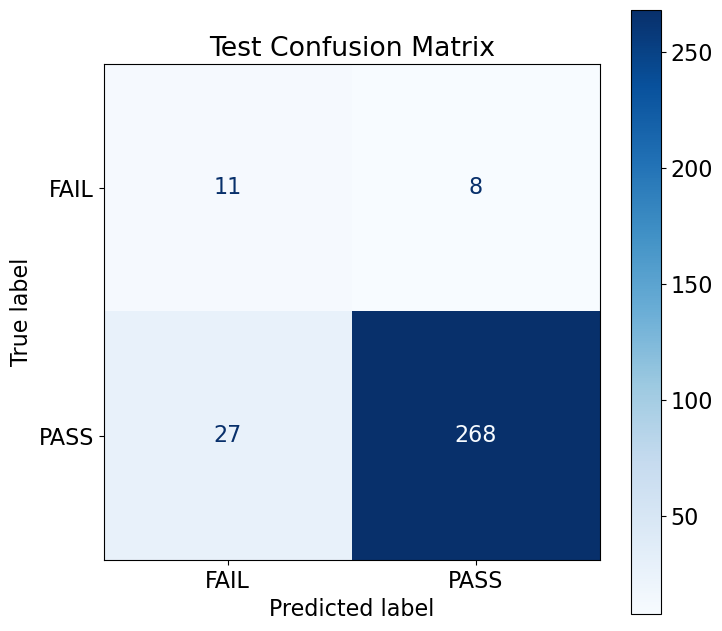

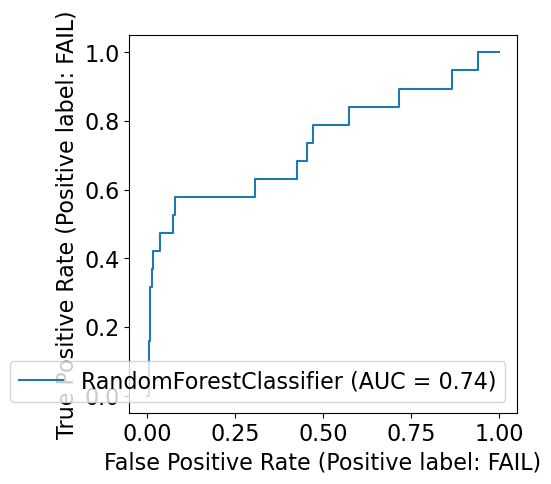

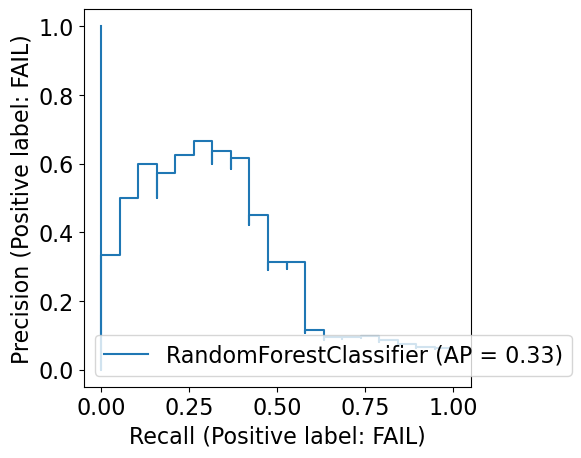

In [82]:
# with hyper parameter tuning
run_ML_process(X_resampled, y_resampled, X_test, y_test,rf_random.best_estimator_)

### 6.2 Model III : XGBoost (without hyperparameter tuning)

Averace Train Accuracy: 0.9706370605339678
Test Accuracy :  0.856687898089172
              precision    recall  f1-score   support

        FAIL       0.20      0.47      0.29        19
        PASS       0.96      0.88      0.92       295

    accuracy                           0.86       314
   macro avg       0.58      0.68      0.60       314
weighted avg       0.92      0.86      0.88       314

COST:  235
Kappa: 0.21976808393152947


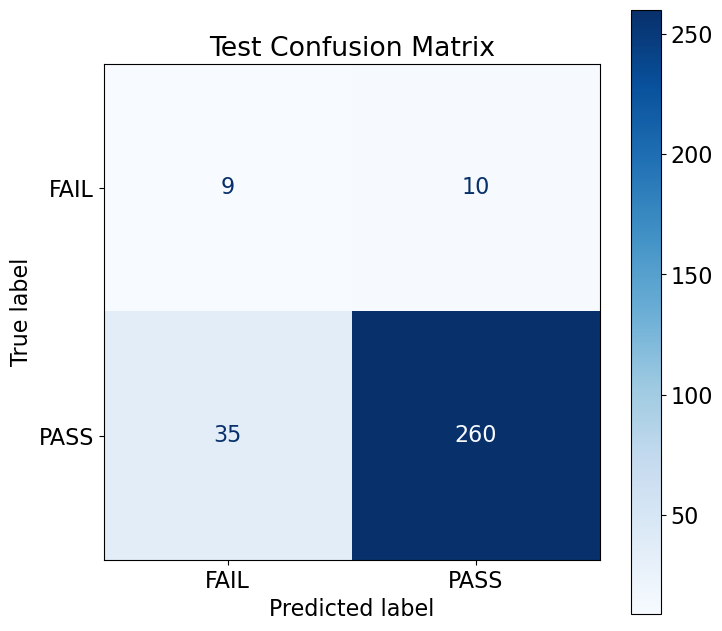

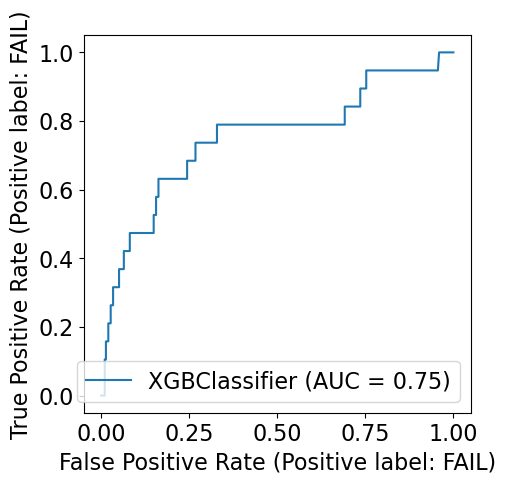

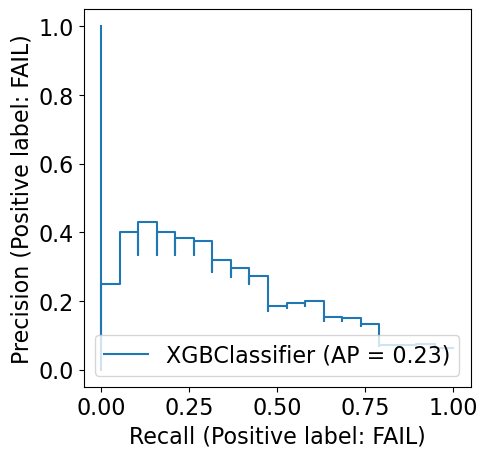

In [83]:
# without hyper parameter tuning
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(random_state=100, verbosity=0))

### 6.3 Model IV : XGBoost (with hyperparameter tuning)

Averace Train Accuracy: 0.9726989162040709
Test Accuracy :  0.8630573248407644
              precision    recall  f1-score   support

        FAIL       0.23      0.53      0.32        19
        PASS       0.97      0.88      0.92       295

    accuracy                           0.86       314
   macro avg       0.60      0.71      0.62       314
weighted avg       0.92      0.86      0.89       314

COST:  214
Kappa: 0.25444505797901706


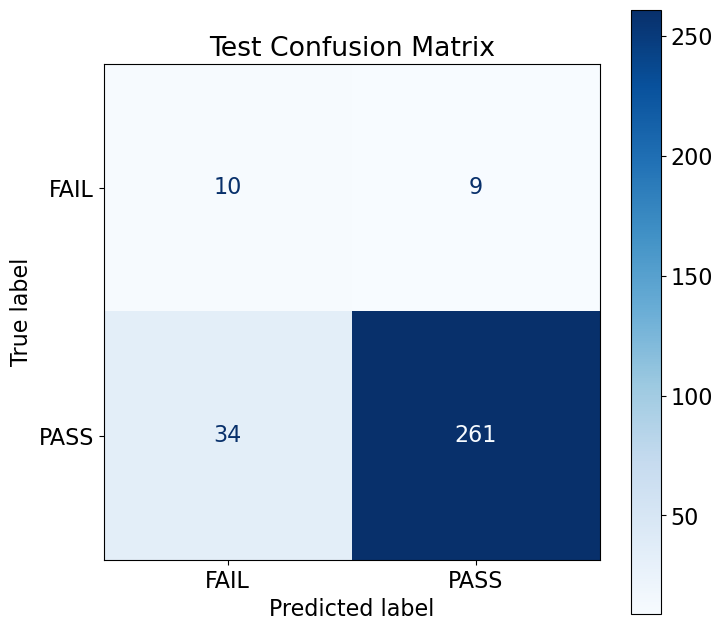

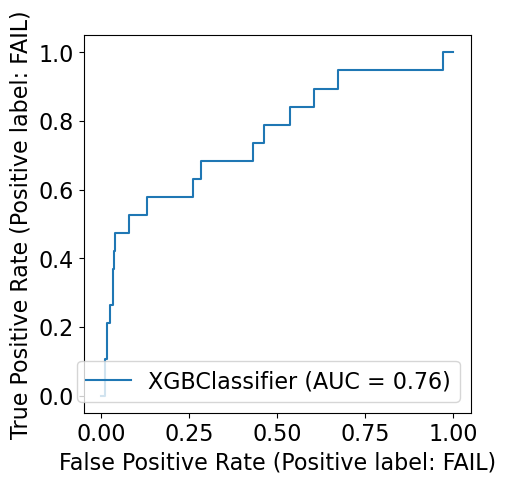

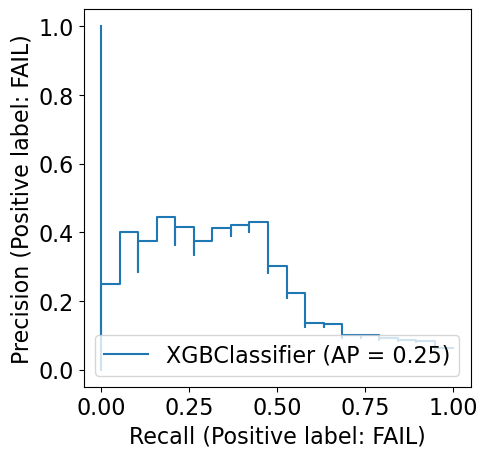

In [84]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, xgb_search.best_estimator_)

# XGBoost Model 3

Averace Train Accuracy: 0.9382183452286545
Test Accuracy :  0.7898089171974523
              precision    recall  f1-score   support

        FAIL       0.17      0.63      0.27        19
        PASS       0.97      0.80      0.88       295

    accuracy                           0.79       314
   macro avg       0.57      0.72      0.57       314
weighted avg       0.92      0.79      0.84       314

COST:  199
Kappa: 0.18926531570299676


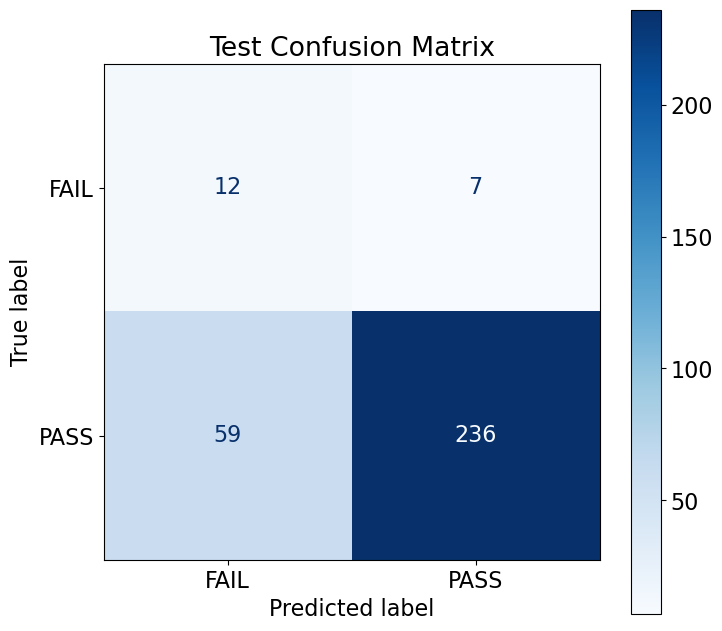

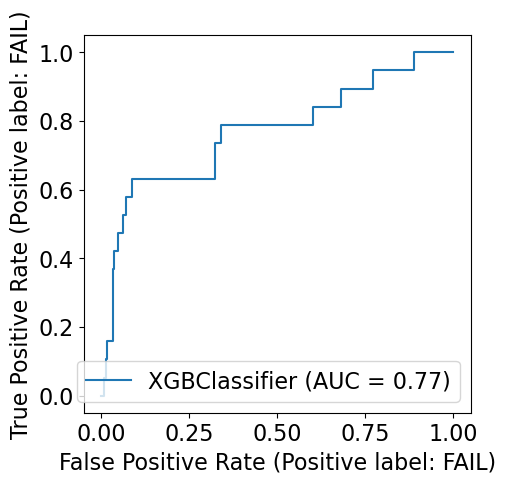

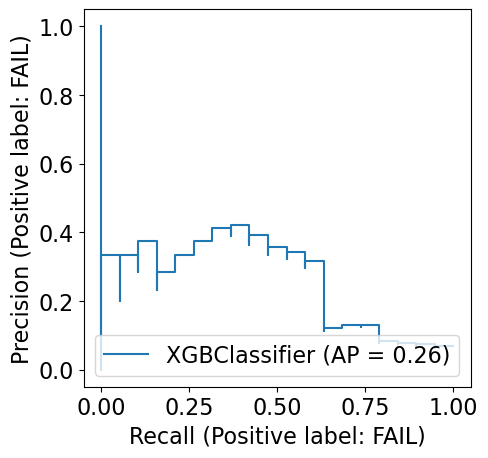

In [85]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "logloss",
                                                                       learning_rate= 0.1,
                                                                       max_depth = 3,
                                                                       min_child_weight= 10,
                                                                       gamma= 0.70,
                                                                       subsample= 0.76,
                                                                       colsample_bytree= 0.95,
                                                                       reg_alpha= 2e-05,
                                                                       reg_lambda = 10))

# XGBoost Model 4

Averace Train Accuracy: 0.9500502246893999
Test Accuracy :  0.8248407643312102
              precision    recall  f1-score   support

        FAIL       0.20      0.63      0.30        19
        PASS       0.97      0.84      0.90       295

    accuracy                           0.82       314
   macro avg       0.59      0.73      0.60       314
weighted avg       0.93      0.82      0.86       314

COST:  188
Kappa: 0.23333037379028676


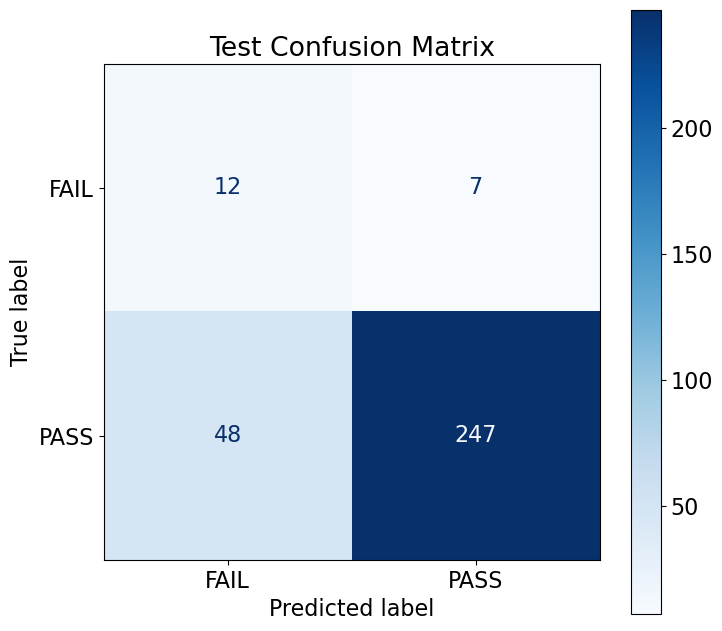

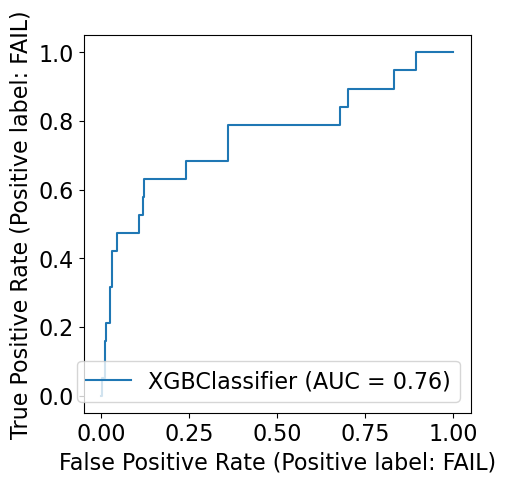

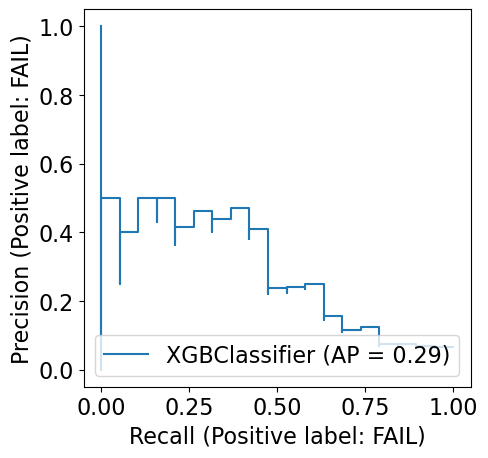

In [86]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "logloss",
                                                                       learning_rate= 0.1,
                                                                       max_depth = 100,
                                                                       min_child_weight= 10,
                                                                       gamma= 0.70,
                                                                       subsample= 0.76,
                                                                       colsample_bytree= 0.95,
                                                                       reg_alpha= 2e-05,
                                                                       reg_lambda = 10))

# XGBoost 5

In [87]:
?XGBClassifier

Averace Train Accuracy: 0.5746656093047845
Test Accuracy :  0.6146496815286624
              precision    recall  f1-score   support

        FAIL       0.12      0.84      0.21        19
        PASS       0.98      0.60      0.75       295

    accuracy                           0.61       314
   macro avg       0.55      0.72      0.48       314
weighted avg       0.93      0.61      0.71       314

COST:  178
Kappa: 0.1153899883585564


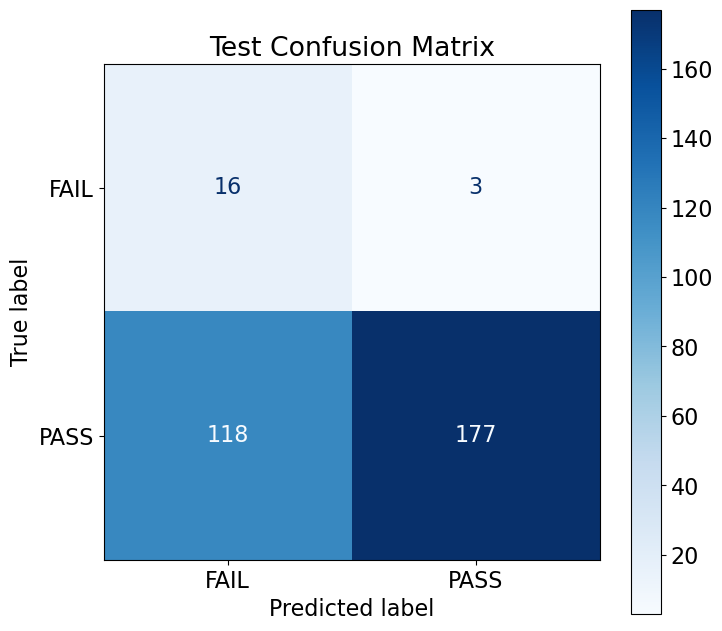

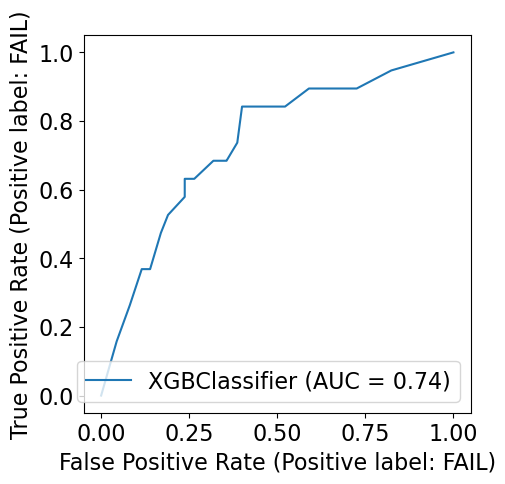

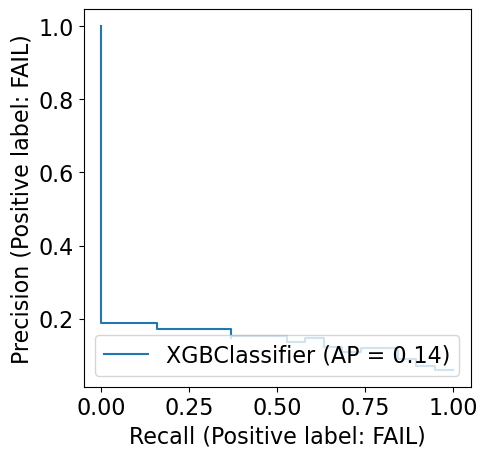

In [88]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "error",
                                                                       learning_rate= 0.5,
                                                                       max_depth = 1000,
                                                                       min_child_weight= 200,
                                                                       gamma= 0.9,
                                                                       subsample= 0.9,
                                                                       colsample_bytree= 1,
                                                                       reg_alpha= 2,
                                                                       reg_lambda = 100,
                                                                      random_state=0))

# XGBoost Model 6

Averace Train Accuracy: 0.7847422680412371
Test Accuracy :  0.6687898089171974
              precision    recall  f1-score   support

        FAIL       0.13      0.79      0.22        19
        PASS       0.98      0.66      0.79       295

    accuracy                           0.67       314
   macro avg       0.56      0.73      0.51       314
weighted avg       0.93      0.67      0.76       314

COST:  180
Kappa: 0.13393093937304412


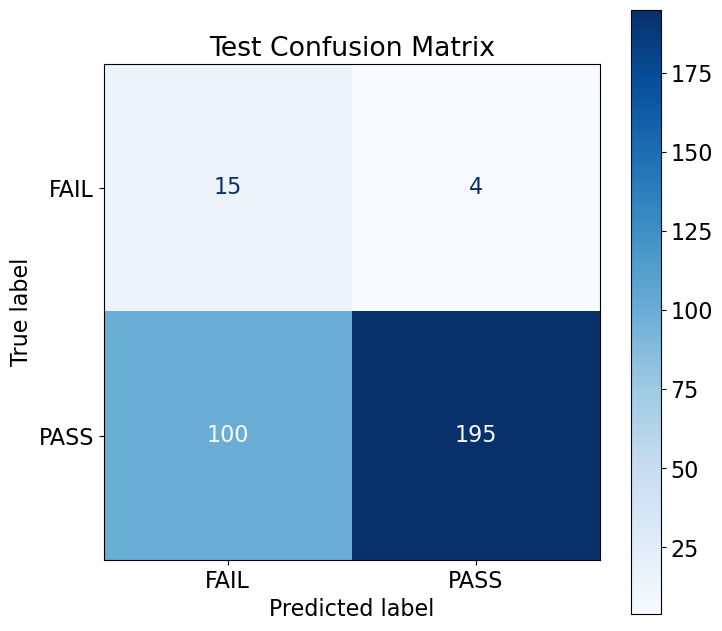

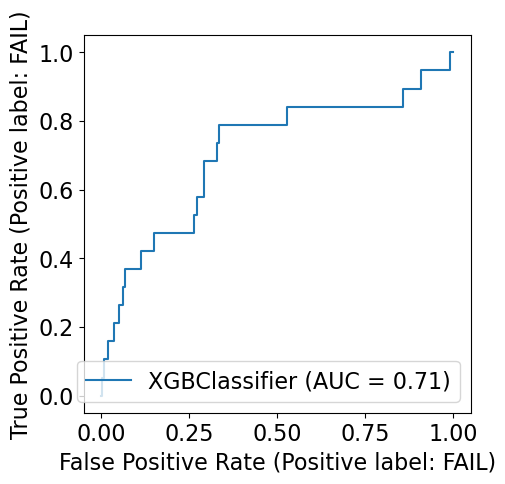

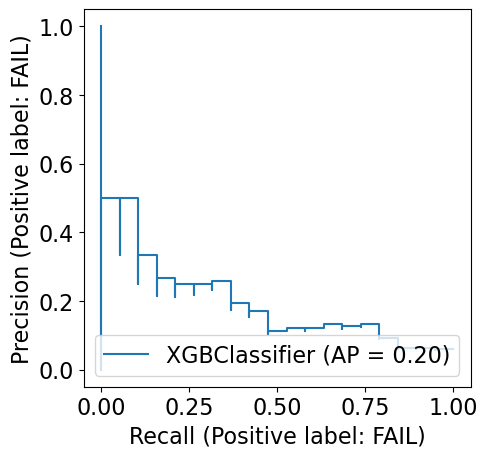

In [89]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "error",
                                                                       learning_rate= 0.5,
                                                                       max_depth = 1000,
                                                                       min_child_weight= 150,
                                                                       gamma= 0.9,
                                                                       subsample= 0.9,
                                                                       colsample_bytree= 1,
                                                                       reg_alpha= 2,
                                                                       reg_lambda = 100,
                                                                      random_state=0))

# XGBoost Model 7

Averace Train Accuracy: 0.5746656093047845
Test Accuracy :  0.2484076433121019
              precision    recall  f1-score   support

        FAIL       0.07      0.95      0.13        19
        PASS       0.98      0.20      0.34       295

    accuracy                           0.25       314
   macro avg       0.53      0.58      0.23       314
weighted avg       0.93      0.25      0.32       314

COST:  255
Kappa: 0.02229727946803184


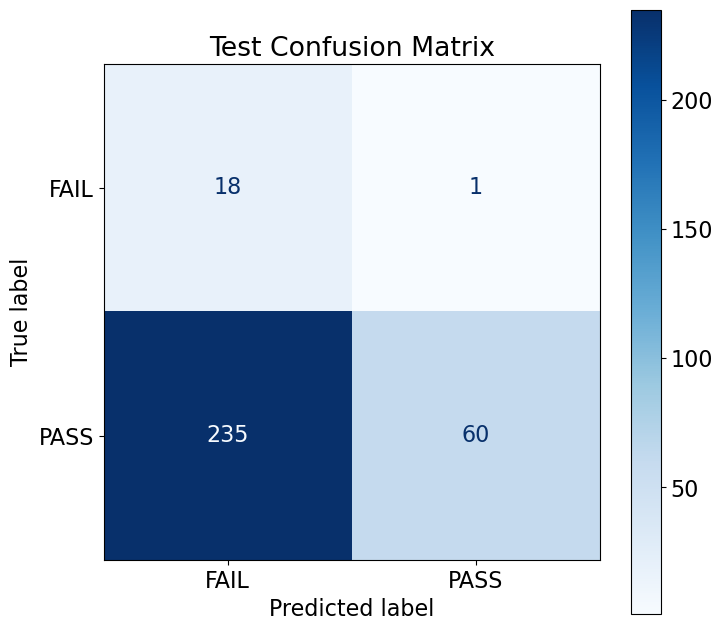

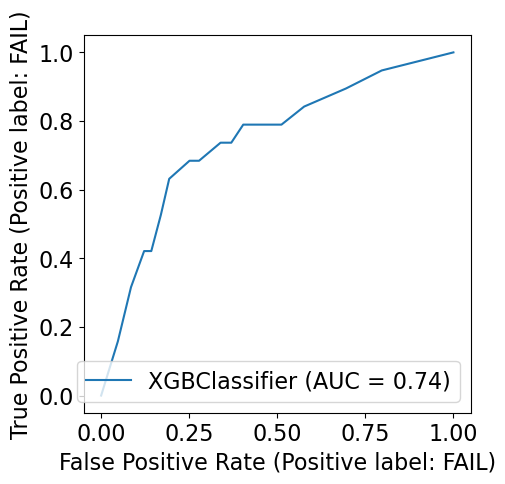

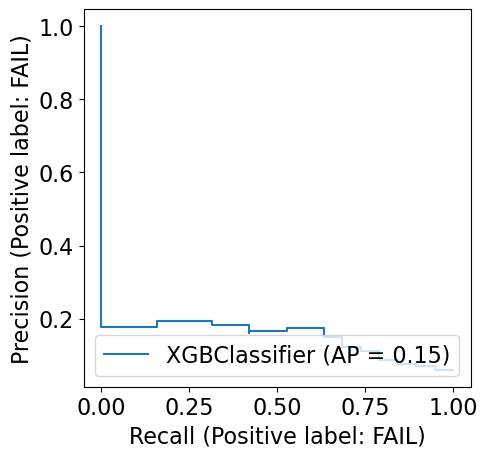

In [90]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logitraw',
                                                                       eval_metric= "error",
                                                                       learning_rate= 0.5,
                                                                       max_depth = 1000,
                                                                       min_child_weight= 200,
                                                                       gamma= 0.9,
                                                                       subsample= 0.9,
                                                                       colsample_bytree= 0.9,
                                                                       reg_alpha= 1,
                                                                       reg_lambda = 100,
                                                                      random_state=0))

# XGboost 8

Averace Train Accuracy: 0.8676685170499603
Test Accuracy :  0.6369426751592356
              precision    recall  f1-score   support

        FAIL       0.11      0.68      0.19        19
        PASS       0.97      0.63      0.77       295

    accuracy                           0.64       314
   macro avg       0.54      0.66      0.48       314
weighted avg       0.92      0.64      0.73       314

COST:  228
Kappa: 0.09059499009196692


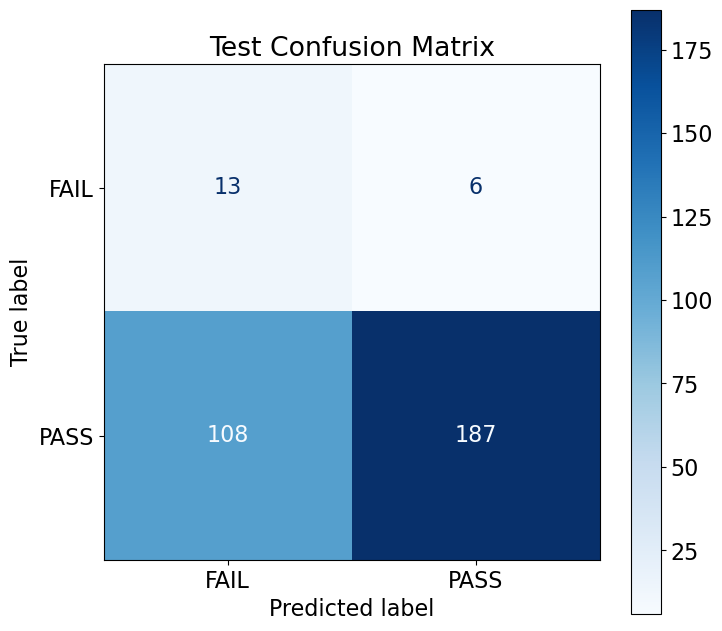

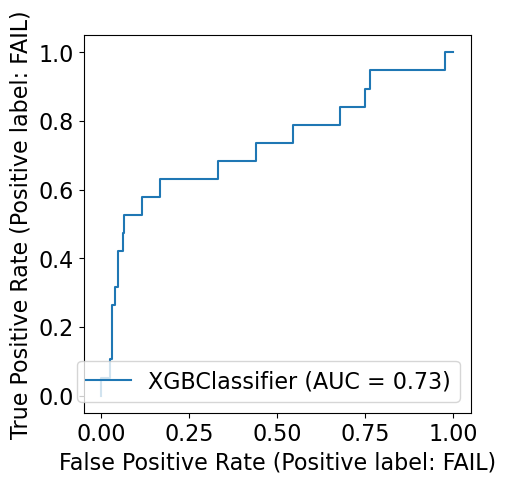

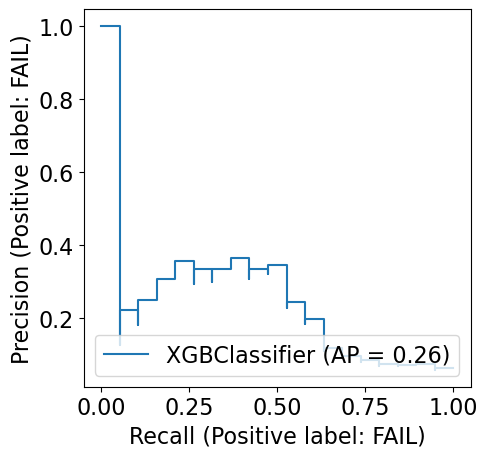

In [91]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logitraw',
                                                                       eval_metric= "error",
                                                                       learning_rate= 0.1,
                                                                       max_depth = 100,
                                                                       min_child_weight= 50,
                                                                       gamma= 0.9,
                                                                       subsample= 0.9,
                                                                       colsample_bytree= 1,
                                                                       reg_alpha= 20,
                                                                       reg_lambda = 10,
                                                                      random_state=0))

# XGBoost 9

Averace Train Accuracy: 0.9588078244779276
Test Accuracy :  0.8312101910828026
              precision    recall  f1-score   support

        FAIL       0.21      0.63      0.31        19
        PASS       0.97      0.84      0.90       295

    accuracy                           0.83       314
   macro avg       0.59      0.74      0.61       314
weighted avg       0.93      0.83      0.87       314

COST:  186
Kappa: 0.2426504050241194


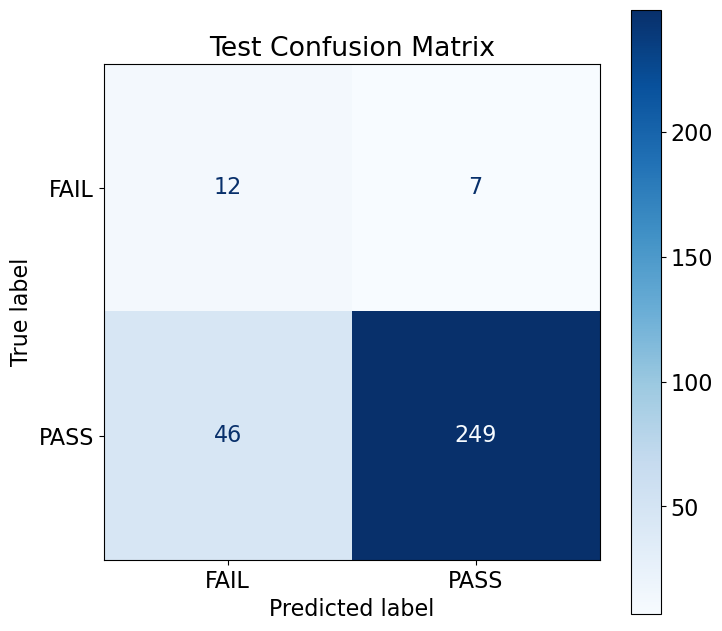

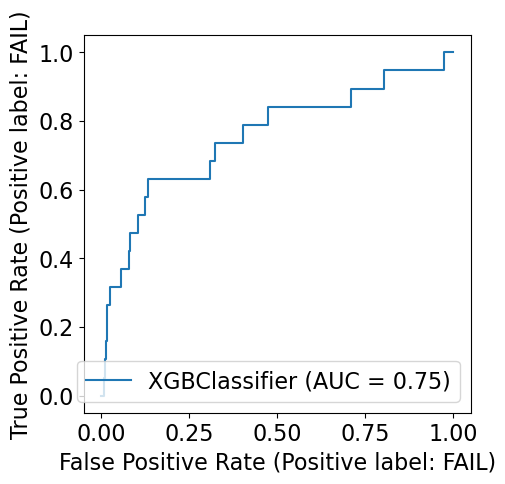

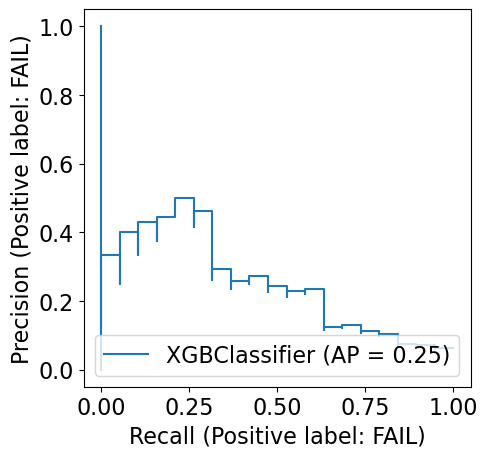

In [92]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "logloss",
                                                                       learning_rate= 0.1,
                                                                       max_depth = 100,
                                                                       min_child_weight= 5,
                                                                       gamma= 0.70,
                                                                       subsample= 0.76,
                                                                       colsample_bytree= 0.95,
                                                                       reg_alpha= 2e-05,
                                                                       reg_lambda = 10))

# XGBoost 10

Averace Train Accuracy: 0.9675574940523395
Test Accuracy :  0.856687898089172
              precision    recall  f1-score   support

        FAIL       0.24      0.63      0.35        19
        PASS       0.97      0.87      0.92       295

    accuracy                           0.86       314
   macro avg       0.61      0.75      0.63       314
weighted avg       0.93      0.86      0.88       314

COST:  178
Kappa: 0.2851360922796722


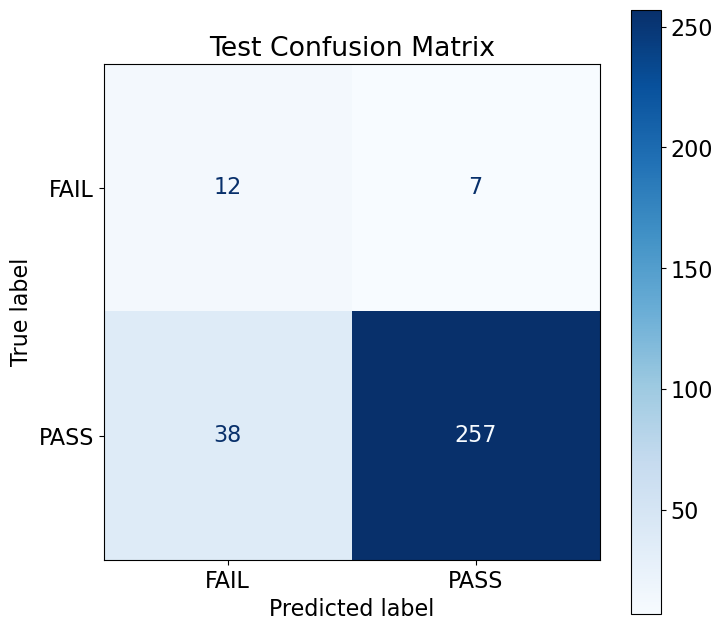

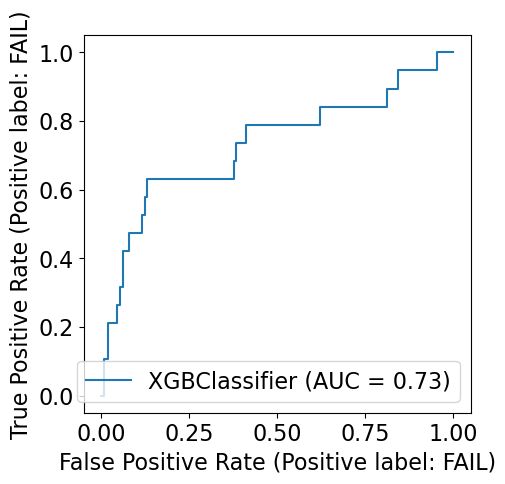

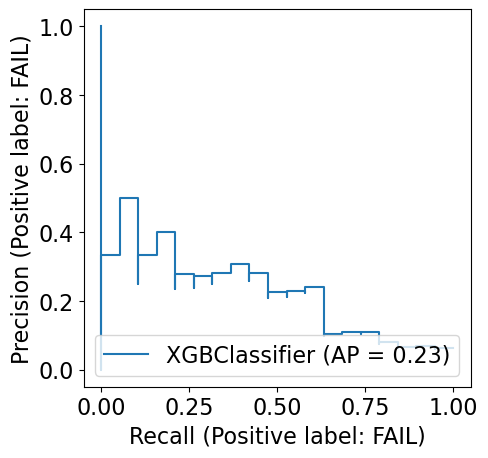

In [93]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "logloss",
                                                                       learning_rate= 0.3,
                                                                       max_depth = 10,
                                                                       min_child_weight= 3,
                                                                       gamma= 0.70,
                                                                       subsample= 0.76,
                                                                       colsample_bytree= 0.95,
                                                                       reg_alpha= 2e-05,
                                                                       reg_lambda = 10,
                                                                      random_state=0))

# XGBoost 11

Averace Train Accuracy: 0.7003330689928629
Test Accuracy :  0.6273885350318471
              precision    recall  f1-score   support

        FAIL       0.12      0.84      0.21        19
        PASS       0.98      0.61      0.76       295

    accuracy                           0.63       314
   macro avg       0.55      0.73      0.49       314
weighted avg       0.93      0.63      0.72       314

COST:  174
Kappa: 0.12206662524494583


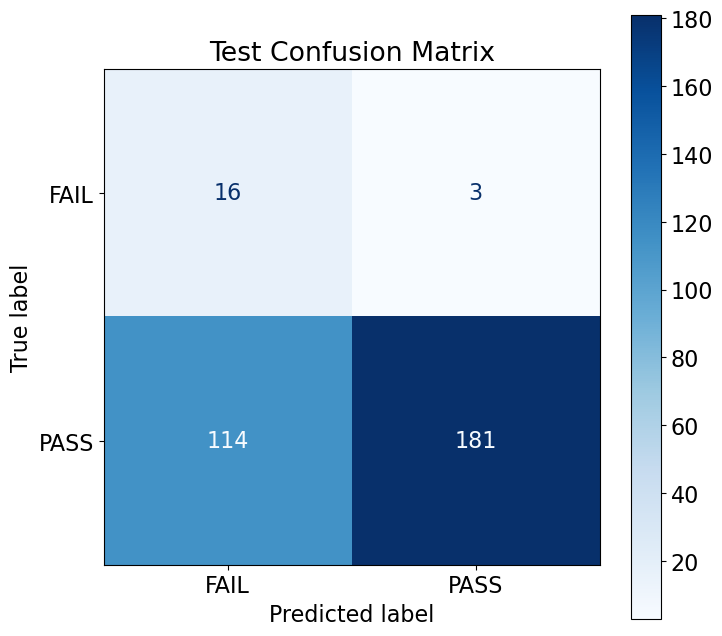

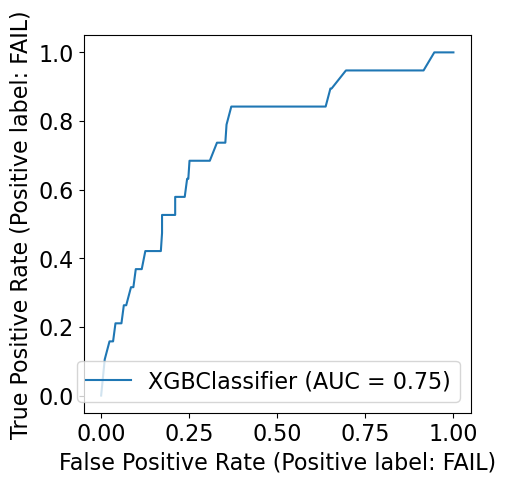

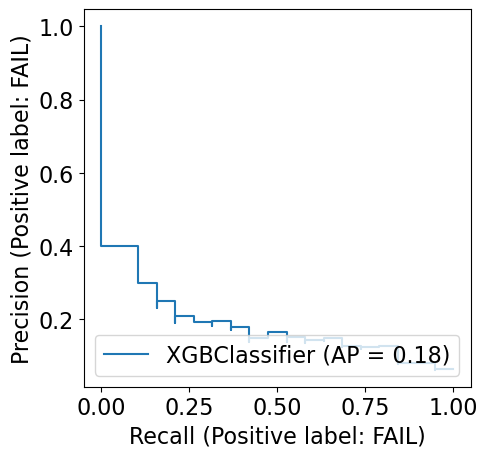

In [94]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "error",
                                                                       learning_rate= 0.5,
                                                                       max_depth = 900,
                                                                       min_child_weight= 200,
                                                                       gamma= 0.8,
                                                                       subsample= 0.95,
                                                                       colsample_bytree= 0.5,
                                                                       reg_alpha= 2,
                                                                       reg_lambda = 100,
                                                                      random_state=0))

# XGBoost 12

Averace Train Accuracy: 0.841379857256146
Test Accuracy :  0.7006369426751592
              precision    recall  f1-score   support

        FAIL       0.13      0.68      0.22        19
        PASS       0.97      0.70      0.81       295

    accuracy                           0.70       314
   macro avg       0.55      0.69      0.52       314
weighted avg       0.92      0.70      0.78       314

COST:  208
Kappa: 0.12782932450800766


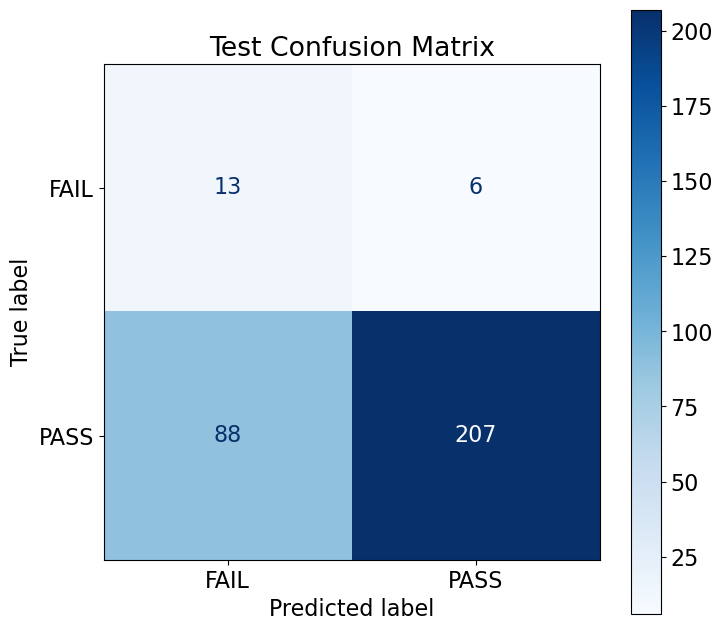

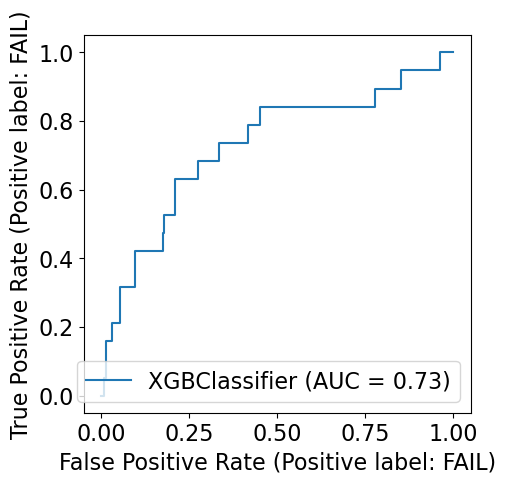

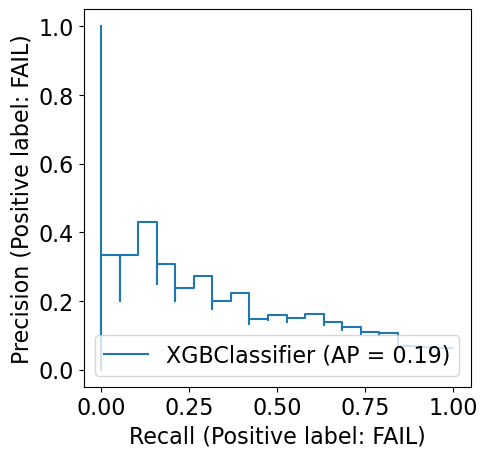

In [95]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "error",
                                                                       learning_rate= 0.5,
                                                                       max_depth = 1000,
                                                                       min_child_weight= 100,
                                                                       gamma= 0.9,
                                                                       subsample= 0.9,
                                                                       colsample_bytree= 1,
                                                                       reg_alpha= 2,
                                                                       reg_lambda = 100,
                                                                      random_state=0))

# XGBoost 13

Averace Train Accuracy: 0.5746656093047845
Test Accuracy :  0.6178343949044586
              precision    recall  f1-score   support

        FAIL       0.11      0.79      0.20        19
        PASS       0.98      0.61      0.75       295

    accuracy                           0.62       314
   macro avg       0.55      0.70      0.47       314
weighted avg       0.93      0.62      0.72       314

COST:  196
Kappa: 0.10545558140639089


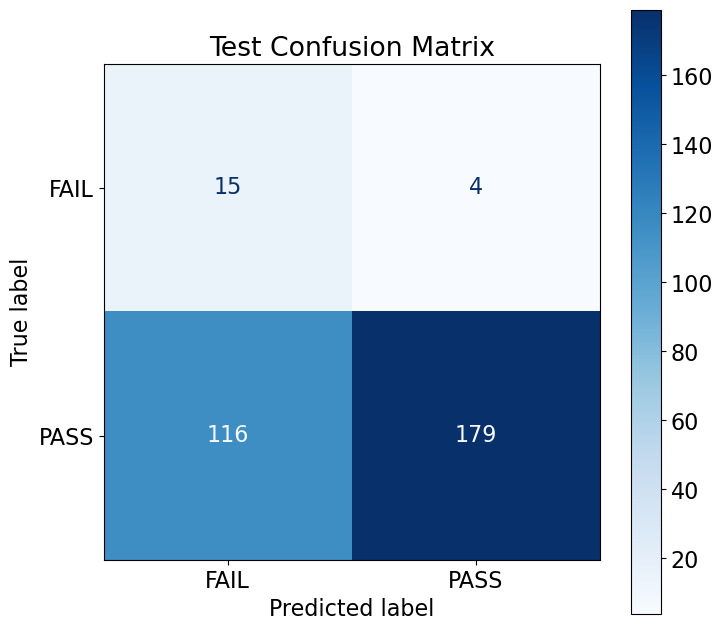

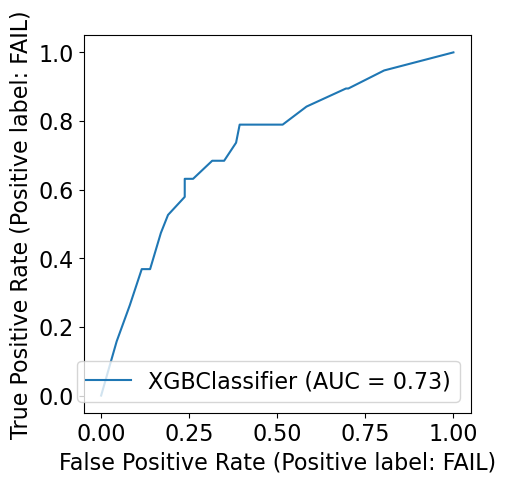

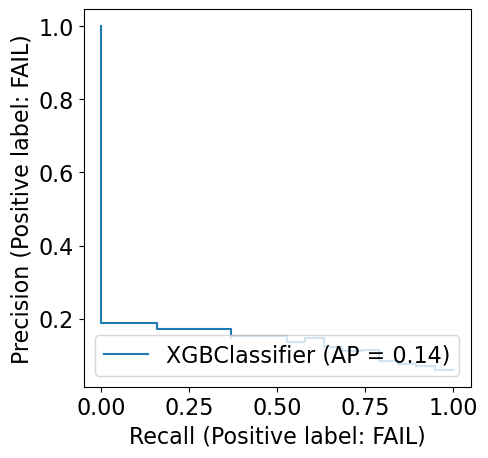

In [96]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "error",
                                                                       learning_rate= 0.5,
                                                                       max_depth = 10,
                                                                       min_child_weight= 200,
                                                                       gamma= 0.9,
                                                                       subsample= 0.9,
                                                                       colsample_bytree= 0.5,
                                                                       reg_alpha= 2,
                                                                       reg_lambda = 100,
                                                                      random_state=0))

# XGBoost 14

Averace Train Accuracy: 0.7852762357916998
Test Accuracy :  0.6815286624203821
              precision    recall  f1-score   support

        FAIL       0.14      0.79      0.23        19
        PASS       0.98      0.67      0.80       295

    accuracy                           0.68       314
   macro avg       0.56      0.73      0.51       314
weighted avg       0.93      0.68      0.76       314

COST:  176
Kappa: 0.142123381235998


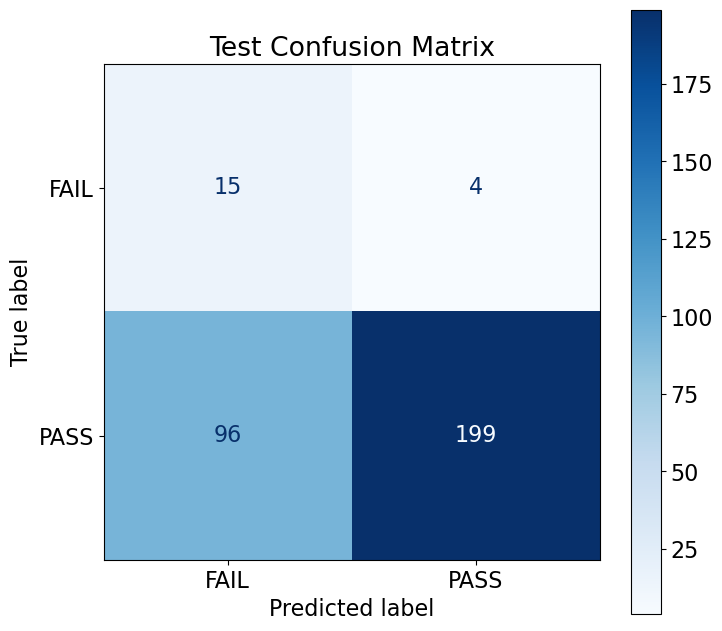

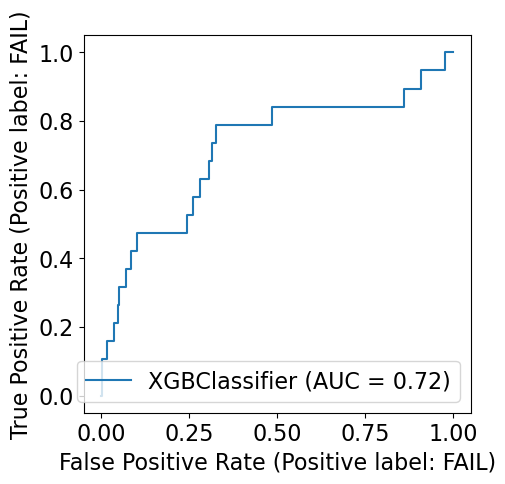

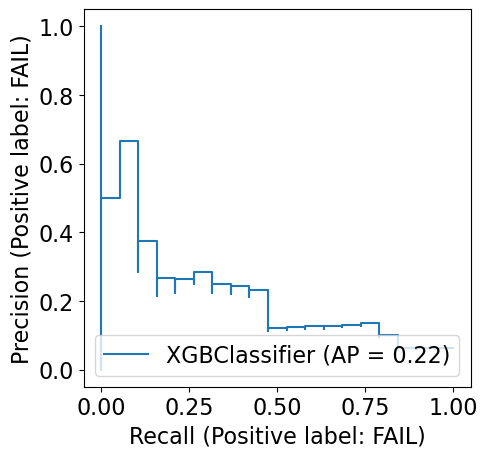

In [148]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "error",
                                                                       learning_rate= 0.68,
                                                                       max_depth = 1000,
                                                                       min_child_weight= 150,
                                                                       gamma= 0.9,
                                                                       subsample= 0.9,
                                                                       colsample_bytree= 1,
                                                                       reg_alpha= 2,
                                                                       reg_lambda = 99,
                                                                      random_state=0))

# XGBoost 15

Averace Train Accuracy: 0.7852762357916998
Test Accuracy :  0.6815286624203821
              precision    recall  f1-score   support

        FAIL       0.14      0.79      0.23        19
        PASS       0.98      0.67      0.80       295

    accuracy                           0.68       314
   macro avg       0.56      0.73      0.51       314
weighted avg       0.93      0.68      0.76       314

COST:  176
Kappa: 0.142123381235998


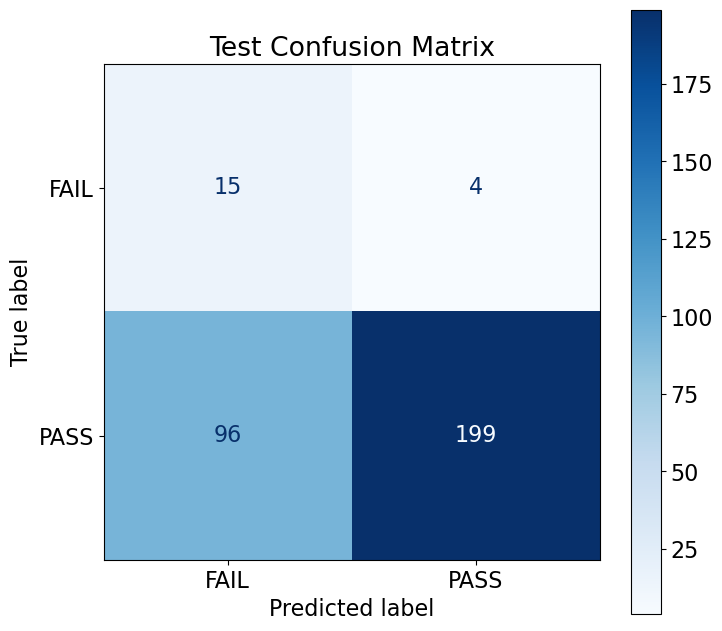

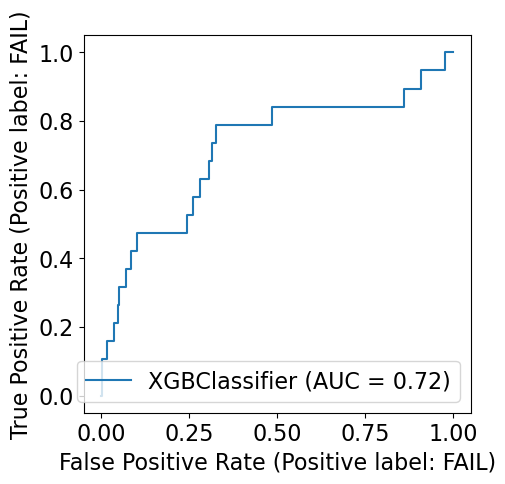

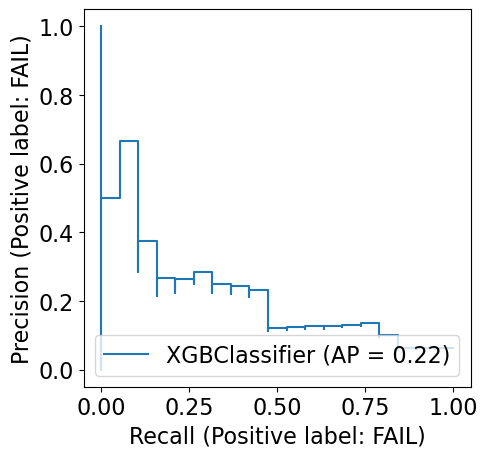

In [183]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "logloss",
                                                                       learning_rate= 0.68,
                                                                       max_depth = 1000,
                                                                       min_child_weight= 150,
                                                                       gamma= 0.1,
                                                                       subsample= 0.9,
                                                                       colsample_bytree= 1,
                                                                       reg_alpha= 2,
                                                                       reg_lambda = 99,
                                                                      random_state=0))

In [ ]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, XGBClassifier(objective='binary:logistic',
                                                                       eval_metric= "rmse",
                                                                       learning_rate= 0.68,
                                                                       max_depth = 1000,
                                                                       min_child_weight= 150,
                                                                       gamma= 0.1,
                                                                       subsample= 0.9,
                                                                       colsample_bytree= 1,
                                                                       reg_alpha= 2,
                                                                       reg_lambda = 99,
                                                                      random_state=0))

In [ ]:
# A parameter grid for XGBoost

params = {
    "learning_rate"    : [ 0.10, 0.3, 0.5, 0.7, 0.9] ,
    "max_depth"        : [ 10,100, 500, 1000],
    "min_child_weight" : [ 2, 10, 100, 150, 200 ],
    "gamma"            : [ 0.001, 0.01, 0.1 ],
    "colsample_bytree" : [ 0.3, 0.5, 0.7, 1],
    "reg_alpha" : [2, 10, 50, 100],
    "reg_lambda" : [2, 10, 50, 100],
}


#XGBClassifier
xgb = XGBClassifier(random_state=100, verbosity=0)

# Grid Search to find the best parameters
xgb_search = GridSearchCV(xgb, param_grid=params, scoring='recall', cv=2, verbose=1)

#Fit the model
xgb_search.fit(X_resampled, y_resampled)




Fitting 2 folds for each of 19200 candidates, totalling 38400 fits


In [ ]:
# View the results based on f1_score ranking
results = pd.DataFrame(xgb_search.cv_results_)
results_sorted = results.sort_values('rank_test_score', ascending='True')
pd.DataFrame(results_sorted)



In [ ]:

#Printing the best estimator

print('\n Best estimator:')
print(xgb_search.best_estimator_)

print('\n Best hyperparameters:')
print(xgb_search.best_params_)

## 6.3 Model V : RandomForest (paper values)

In [143]:
?RandomForestClassifier

Averace Train Accuracy: 0.8707798043880517
Test Accuracy :  0.6942675159235668
              precision    recall  f1-score   support

        FAIL       0.11      0.58      0.19        19
        PASS       0.96      0.70      0.81       295

    accuracy                           0.69       314
   macro avg       0.54      0.64      0.50       314
weighted avg       0.91      0.69      0.77       314

COST:  248
Kappa: 0.09450285370982281


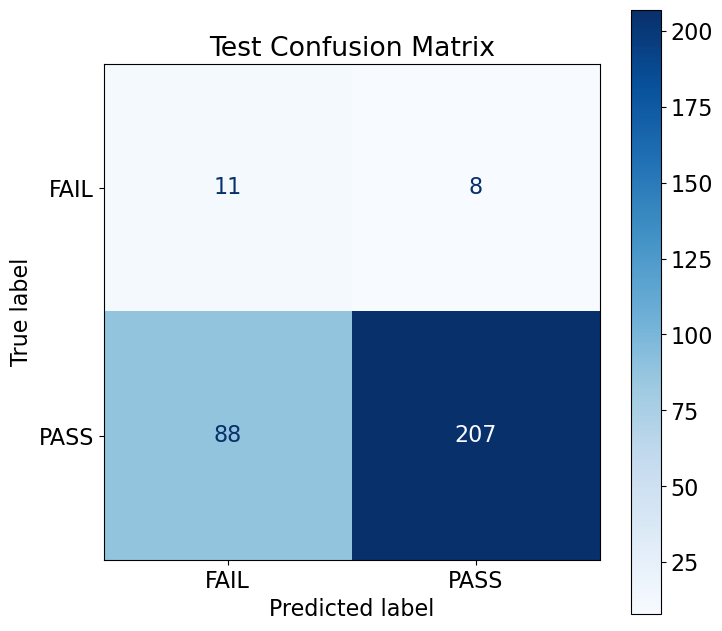

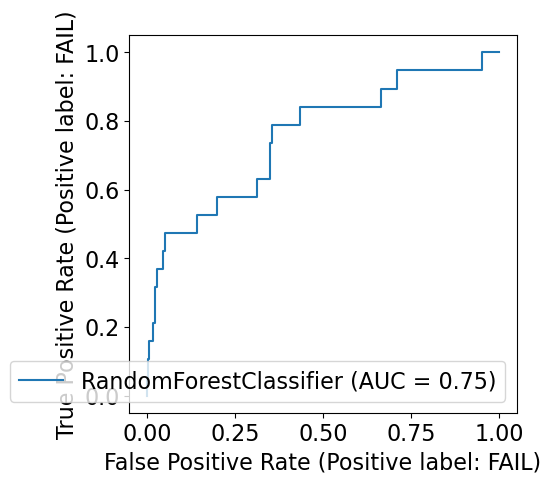

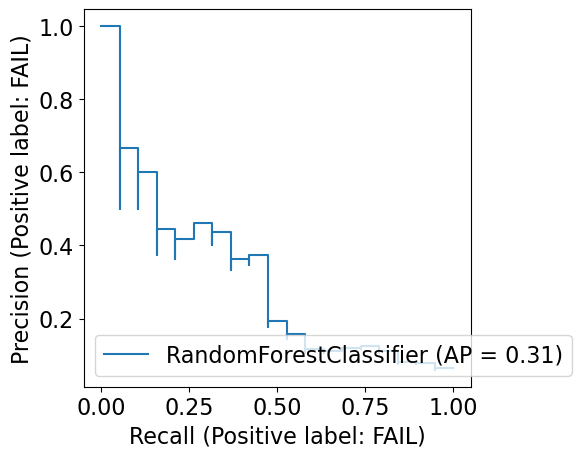

In [144]:
# Random Forest Model
run_ML_process(X_resampled, y_resampled, X_test, y_test, RandomForestClassifier(n_estimators=20, criterion='gini', max_features='auto', max_depth=20,  random_state=100, max_samples= 100, min_samples_split=20))

# II

Averace Train Accuracy: 0.8800396510705788
Test Accuracy :  0.6942675159235668
              precision    recall  f1-score   support

        FAIL       0.11      0.58      0.19        19
        PASS       0.96      0.70      0.81       295

    accuracy                           0.69       314
   macro avg       0.54      0.64      0.50       314
weighted avg       0.91      0.69      0.77       314

COST:  248
Kappa: 0.09450285370982281


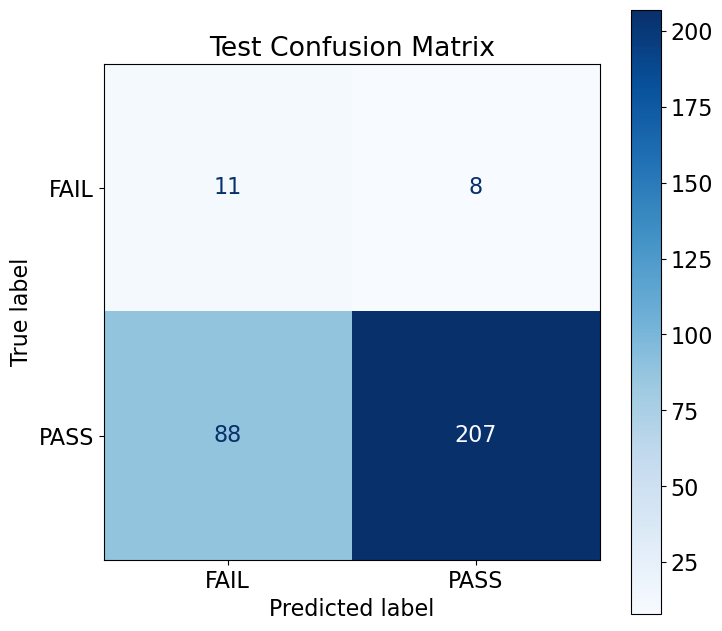

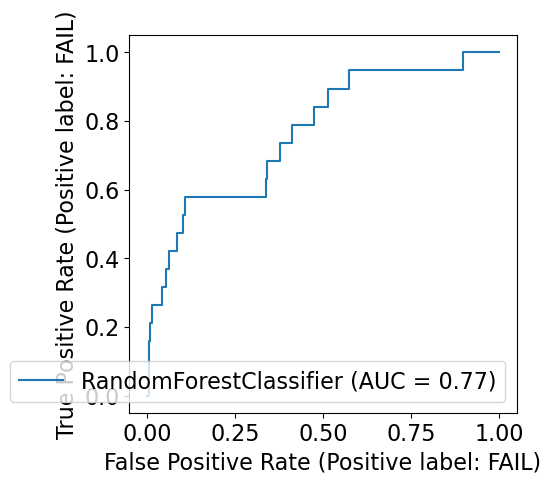

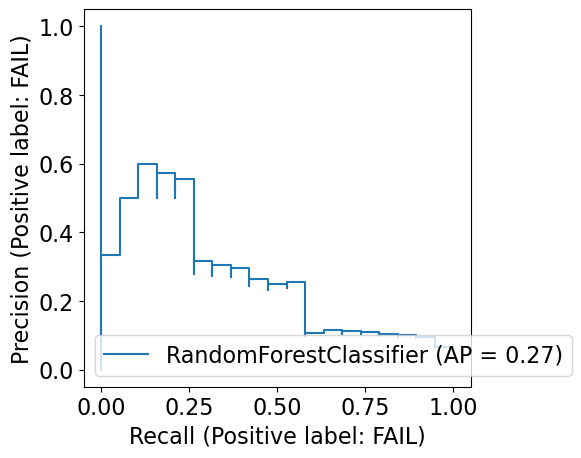

In [99]:
# Random Forest Model
run_ML_process(X_resampled, y_resampled, X_test, y_test, RandomForestClassifier(n_estimators=20, criterion='entropy', max_features='log2', max_depth=20,  random_state=100, max_samples= 100, min_samples_split=20))

# III

Averace Train Accuracy: 0.8620274914089346
Test Accuracy :  0.6878980891719745
              precision    recall  f1-score   support

        FAIL       0.12      0.68      0.21        19
        PASS       0.97      0.69      0.81       295

    accuracy                           0.69       314
   macro avg       0.55      0.69      0.51       314
weighted avg       0.92      0.69      0.77       314

COST:  212
Kappa: 0.11944142391117729


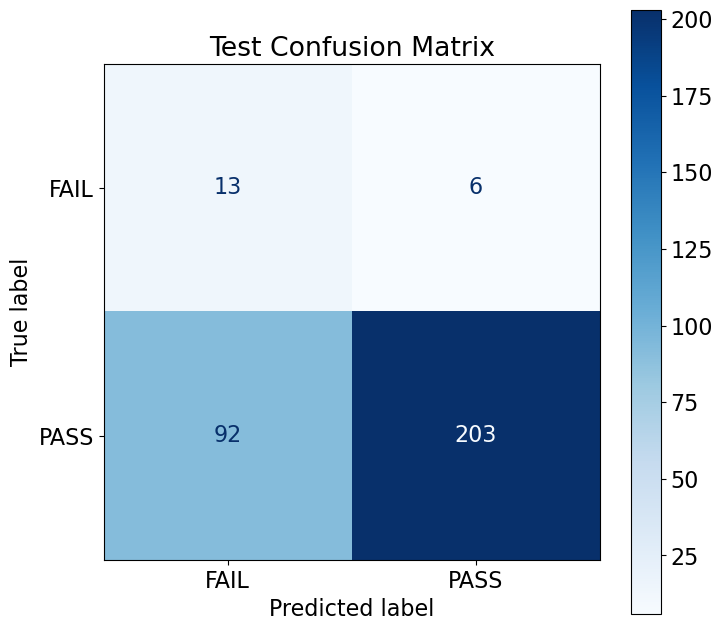

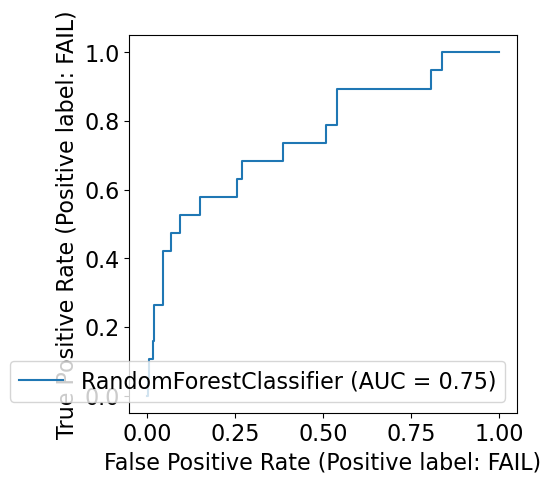

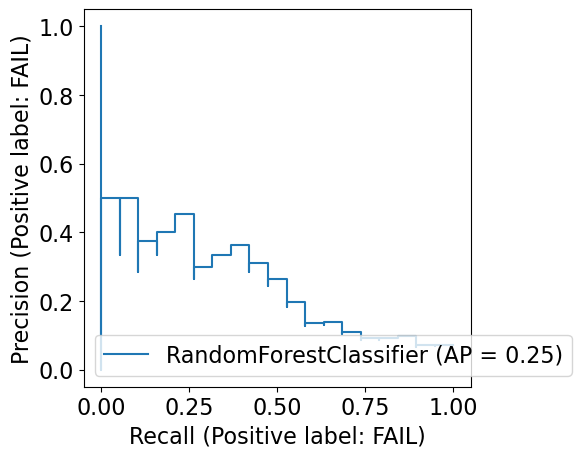

In [100]:
# Random Forest Model
run_ML_process(X_resampled, y_resampled, X_test, y_test, RandomForestClassifier(n_estimators=20, criterion='gini', max_features="auto", max_depth=20,  random_state=100, max_samples= 100, min_samples_split=30))

# IV

In [101]:
?RandomForestClassifier

Averace Train Accuracy: 0.7971583399418452
Test Accuracy :  0.6273885350318471
              precision    recall  f1-score   support

        FAIL       0.11      0.74      0.19        19
        PASS       0.97      0.62      0.76       295

    accuracy                           0.63       314
   macro avg       0.54      0.68      0.48       314
weighted avg       0.92      0.63      0.72       314

COST:  212
Kappa: 0.09827696234843653


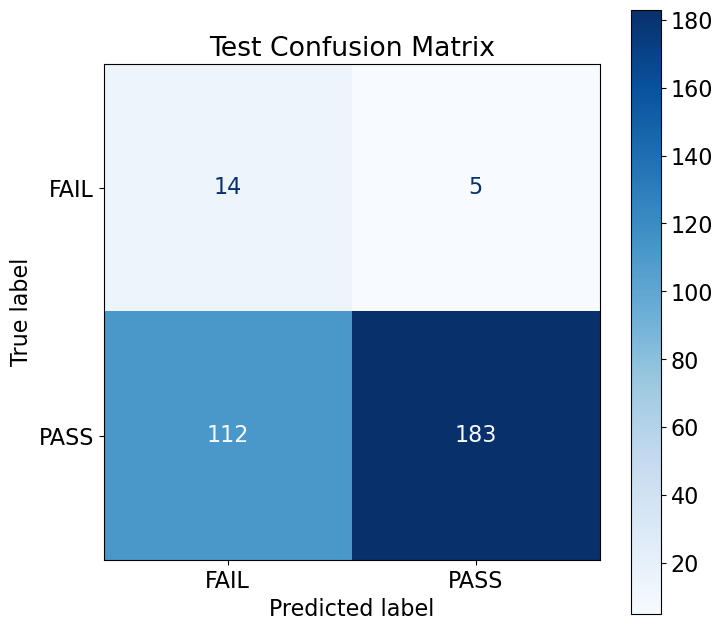

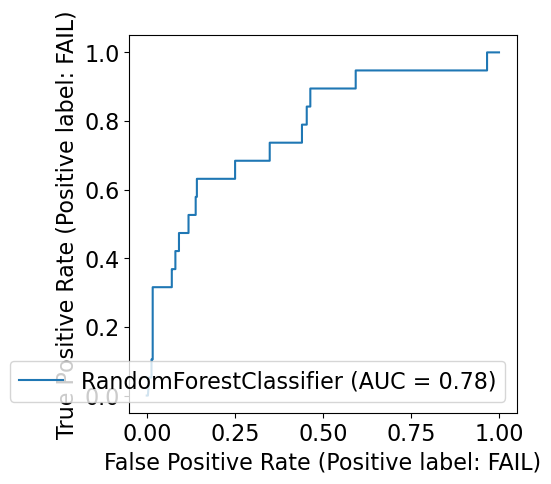

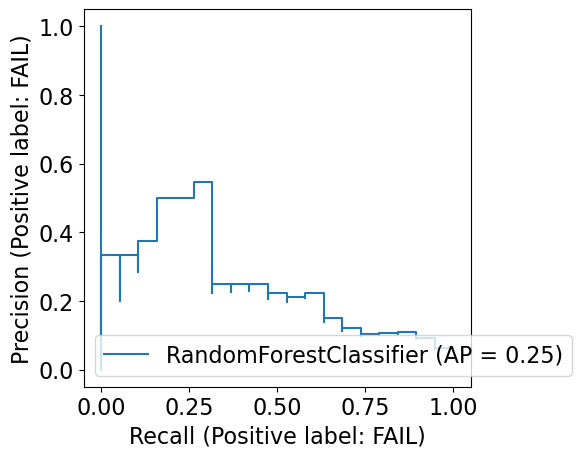

In [102]:
# Random Forest Model
run_ML_process(X_resampled, y_resampled, X_test, y_test, RandomForestClassifier(n_estimators=20, criterion='gini', max_features='auto', max_depth=20,  random_state=100, max_samples= 100, min_samples_split=75))

Averace Train Accuracy: 0.9289611419508328
Test Accuracy :  0.8535031847133758
              precision    recall  f1-score   support

        FAIL       0.22      0.58      0.32        19
        PASS       0.97      0.87      0.92       295

    accuracy                           0.85       314
   macro avg       0.60      0.73      0.62       314
weighted avg       0.92      0.85      0.88       314

COST:  198
Kappa: 0.25890200102616734


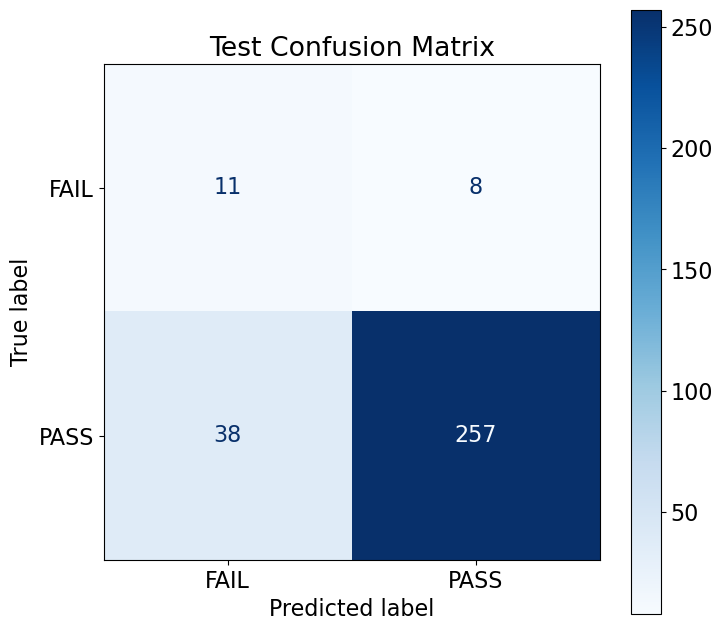

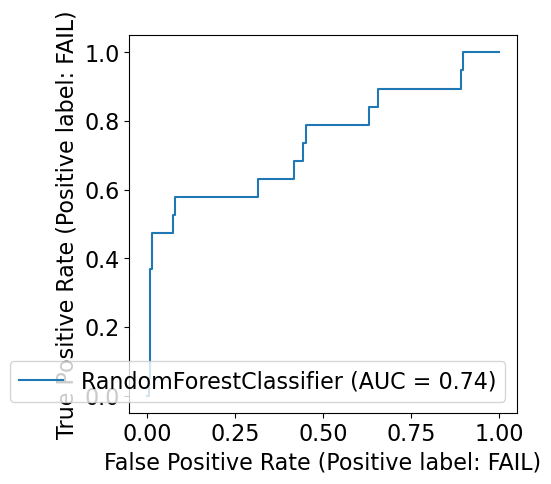

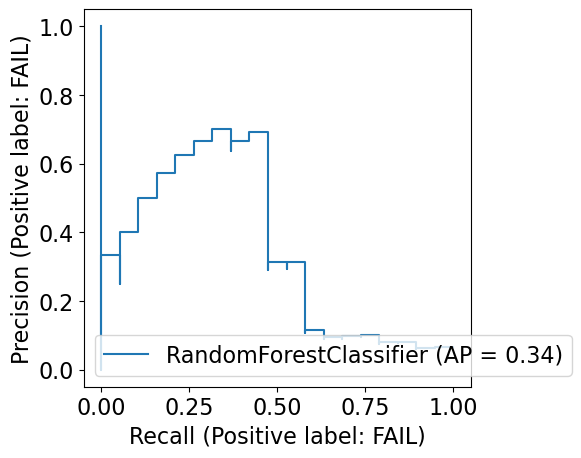

In [103]:
# Random Forest Model
run_ML_process(X_resampled, y_resampled, X_test, y_test, RandomForestClassifier(class_weight='balanced_subsample', max_depth=200, min_samples_split=100, n_estimators=2000,random_state=100))

## Decision Tree

# I

In [104]:
?DecisionTreeClassifier

Object `DecisionTreeClassifier` not found.


In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
depths = np.arange(1, 100,10)
num_leafs = [1, 5, 10, 20, 50, 100]
criterion = ["gini", "entropy"]
min_split =[2, 5, 10, 50]
max_features =["auto", "sqrt", "log2"]

In [107]:
param_grid = [{'max_depth': depths,
              'min_samples_leaf': num_leafs,
              'criterion' : criterion,
              'min_samples_split' : min_split,
              'max_features': max_features}]
dt = DecisionTreeClassifier(random_state=100)

In [108]:
dt_search = GridSearchCV(dt , param_grid=param_grid, scoring='recall', cv=5, verbose=1)

In [109]:
dt_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 5, 10, 20, 50, 100],
                          'min_samples_split': [2, 5, 10, 50]}],
             scoring='recall', verbose=1)

In [110]:
#Printing the best estimator

print('\n Best estimator:')
print(dt_search.best_estimator_)

print('\n Best hyperparameters:')
print(dt_search.best_params_)


 Best estimator:
DecisionTreeClassifier(max_depth=1, max_features='auto', random_state=100)

 Best hyperparameters:
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


Averace Train Accuracy: 0.6653026698387524
Test Accuracy :  0.2802547770700637
              precision    recall  f1-score   support

        FAIL       0.07      0.89      0.13        19
        PASS       0.97      0.24      0.39       295

    accuracy                           0.28       314
   macro avg       0.52      0.57      0.26       314
weighted avg       0.92      0.28      0.37       314

COST:  264
Kappa: 0.020943130708313662


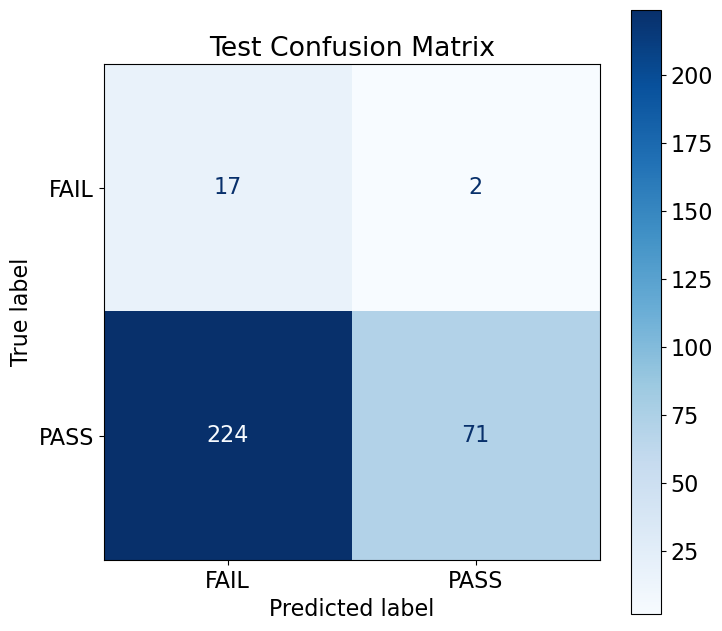

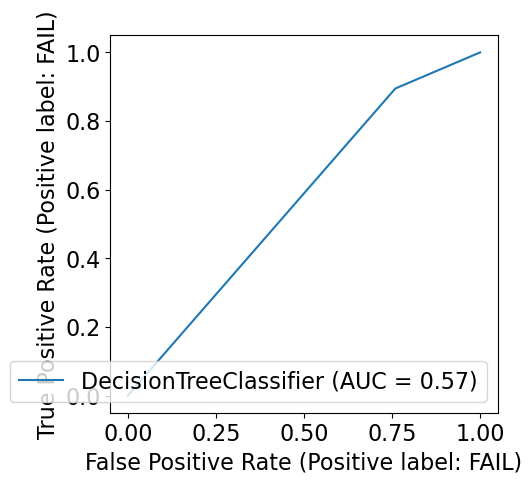

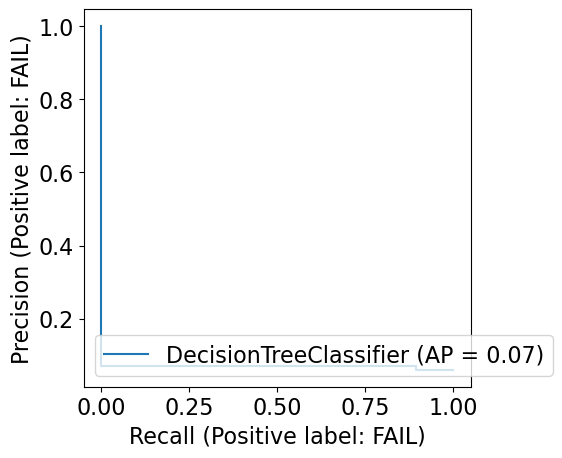

In [111]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, dt_search.best_estimator_)

# II

Averace Train Accuracy: 0.8743669045730901
Test Accuracy :  0.7738853503184714
              precision    recall  f1-score   support

        FAIL       0.13      0.47      0.20        19
        PASS       0.96      0.79      0.87       295

    accuracy                           0.77       314
   macro avg       0.54      0.63      0.54       314
weighted avg       0.91      0.77      0.83       314

COST:  261
Kappa: 0.11832634659495389


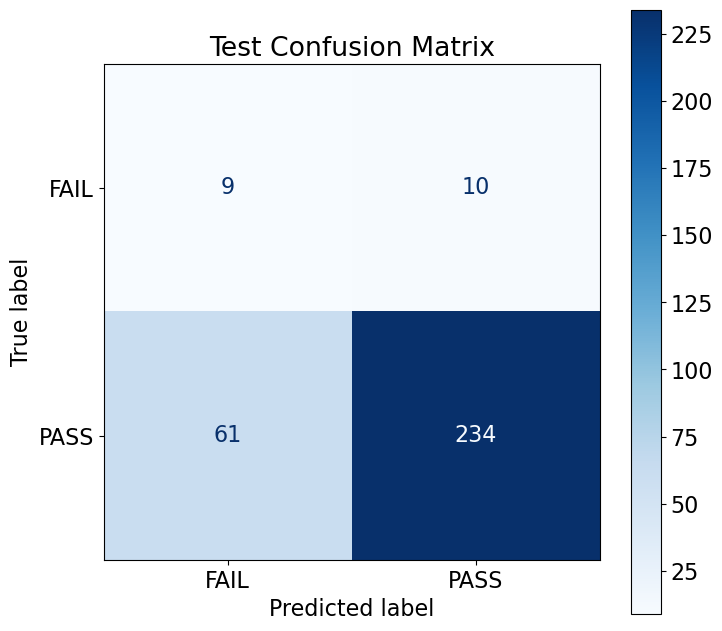

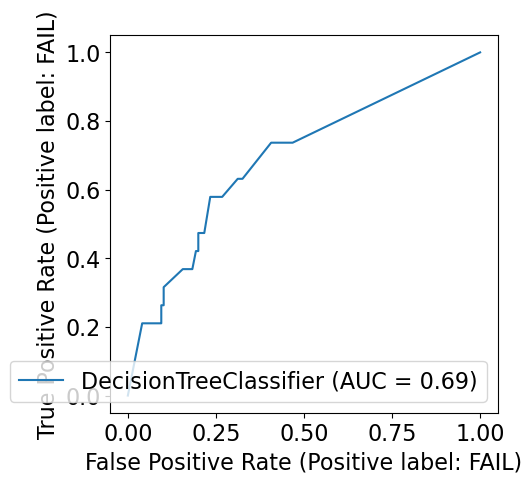

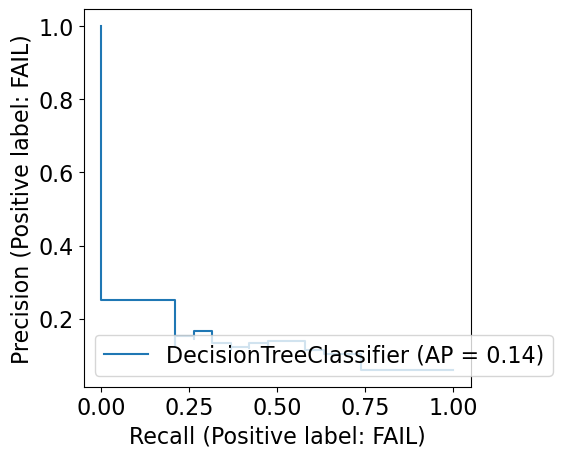

In [112]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_features ='auto', min_samples_leaf= 10, min_samples_split= 10 ,random_state=100))

# III

Averace Train Accuracy: 0.7683029341792228
Test Accuracy :  0.5764331210191083
              precision    recall  f1-score   support

        FAIL       0.10      0.74      0.17        19
        PASS       0.97      0.57      0.72       295

    accuracy                           0.58       314
   macro avg       0.53      0.65      0.44       314
weighted avg       0.92      0.58      0.68       314

COST:  228
Kappa: 0.07520262190531046


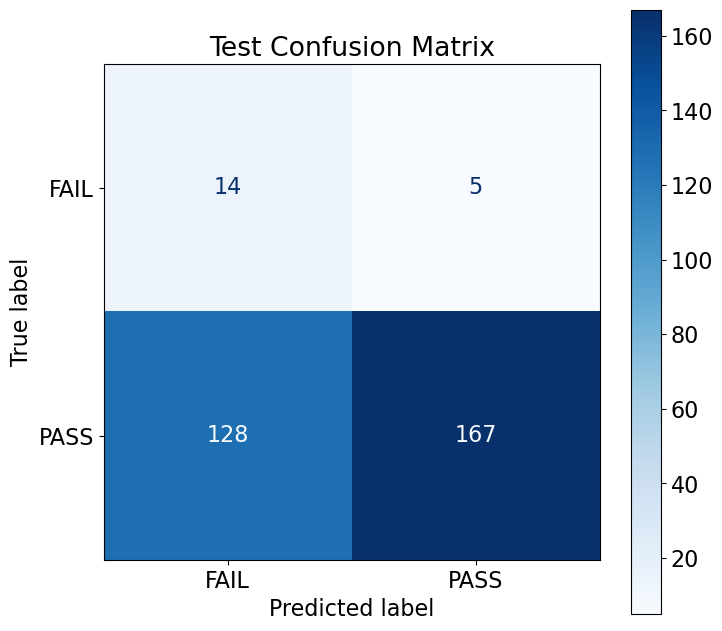

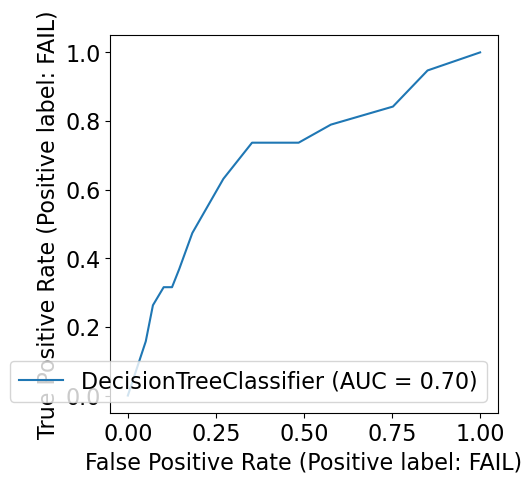

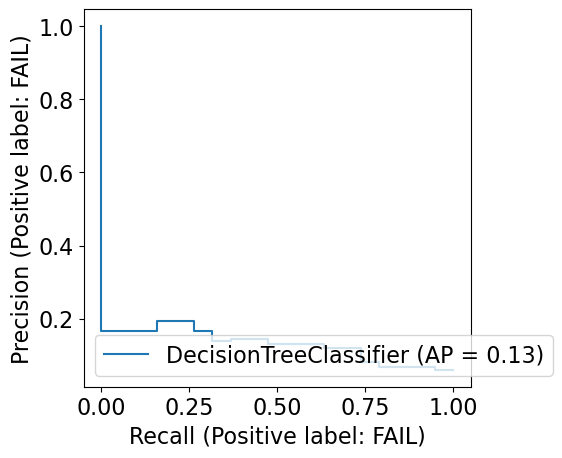

In [113]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_features ='auto', min_samples_leaf= 100, min_samples_split= 2 ,random_state=100))

# Baggage Classifier

# I

In [114]:
?DecisionTreeClassifier

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [116]:
params_grid = {"base_estimator__max_depth": [5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 5, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 1.0],
          'max_samples': [0.5, 1.0],
          'n_estimators': [5, 10, 20],
}




In [117]:
bc = BaggingClassifier(DecisionTreeClassifier(random_state=100))


In [118]:
bc_search = GridSearchCV(bc, params_grid, cv=3, verbose=1)

bc_search.fit(X_resampled, y_resampled)


Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=100)),
             param_grid={'base_estimator__max_depth': [5, 10, 20],
                         'base_estimator__max_features': [None, 'auto'],
                         'base_estimator__min_samples_leaf': [1, 5, 10],
                         'base_estimator__min_samples_split': [2, 5, 7],
                         'bootstrap_features': [False, True],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [5, 10, 20]},
             verbose=1)

In [119]:
#Printing the best estimator

print('\n Best estimator:')
print(bc_search.best_estimator_)

print('\n Best hyperparameters:')
print(bc_search.best_params_)


 Best estimator:
BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                        max_features='auto',
                                                        min_samples_split=5,
                                                        random_state=100),
                  n_estimators=20)

 Best hyperparameters:
{'base_estimator__max_depth': 20, 'base_estimator__max_features': 'auto', 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 5, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}


Averace Train Accuracy: 0.9665265662172879
Test Accuracy :  0.8853503184713376
              precision    recall  f1-score   support

        FAIL       0.26      0.47      0.33        19
        PASS       0.96      0.91      0.94       295

    accuracy                           0.89       314
   macro avg       0.61      0.69      0.64       314
weighted avg       0.92      0.89      0.90       314

COST:  226
Kappa: 0.27659029822091397


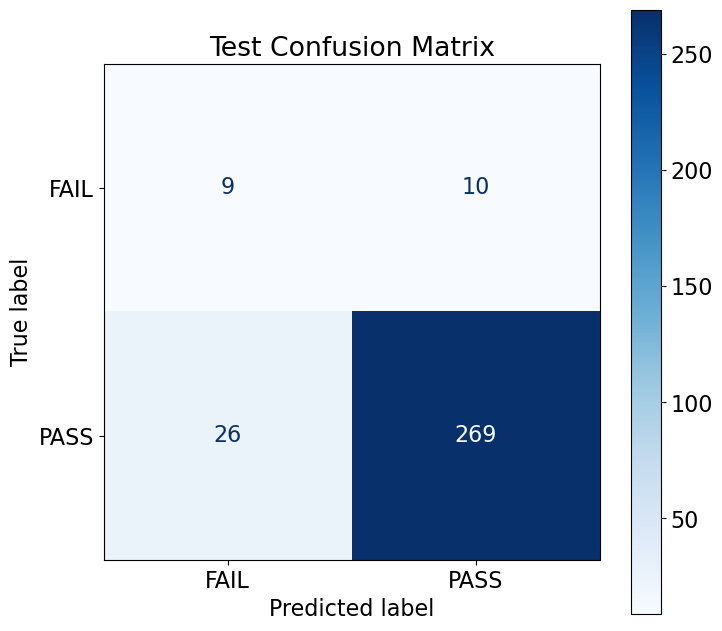

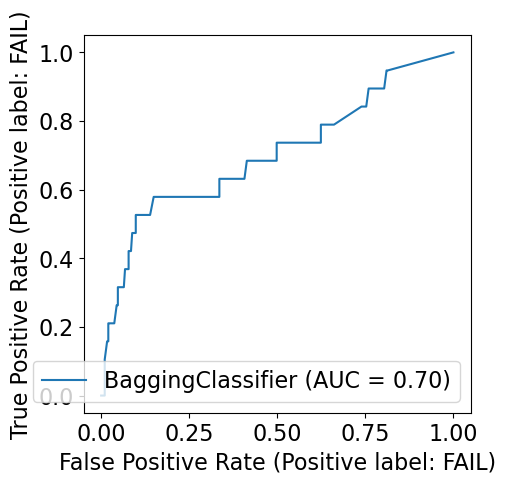

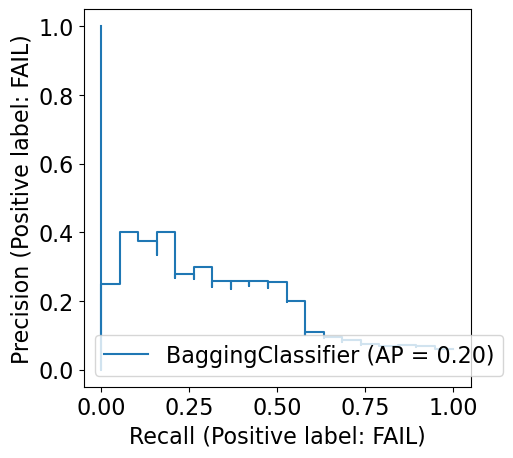

In [120]:
run_ML_process(X_resampled, y_resampled, X_test, y_test, bc_search.best_estimator_ )

In [121]:
?BaggingClassifier

# II

Averace Train Accuracy: 0.9727042030134815
Test Accuracy :  0.8757961783439491
              precision    recall  f1-score   support

        FAIL       0.24      0.47      0.32        19
        PASS       0.96      0.90      0.93       295

    accuracy                           0.88       314
   macro avg       0.60      0.69      0.62       314
weighted avg       0.92      0.88      0.89       314

COST:  229
Kappa: 0.25574328430776716


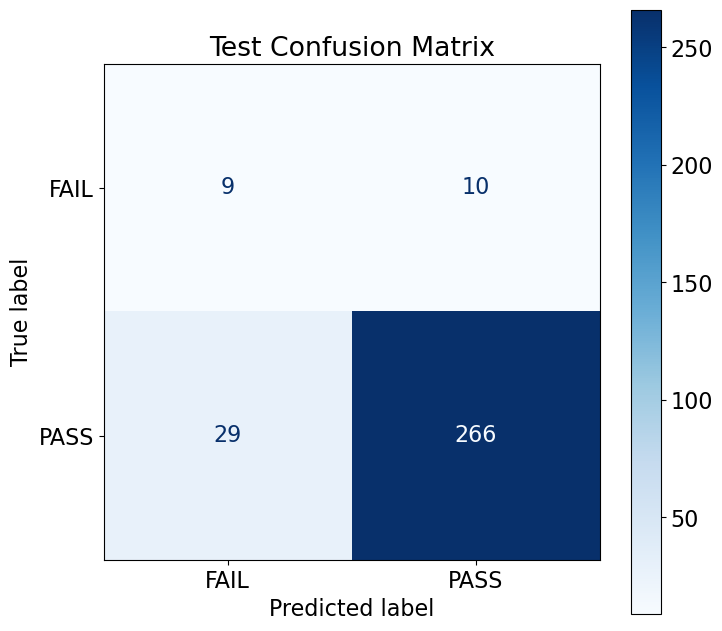

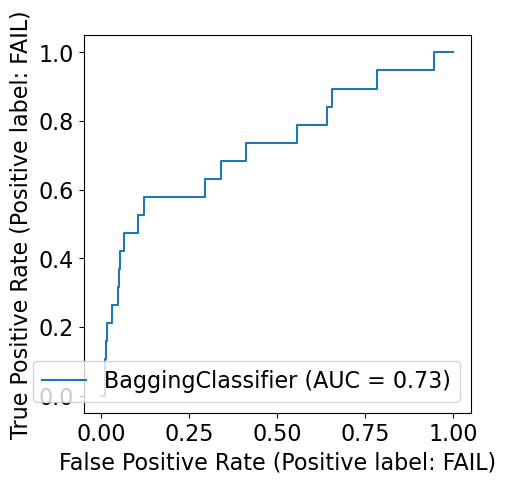

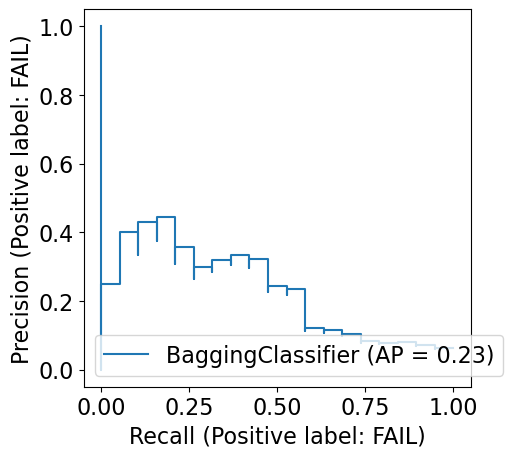

In [122]:
run_ML_process(X_resampled, y_resampled, X_test, y_test,BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                        min_samples_split=5,
                                                        random_state=100),
                  bootstrap_features=True, n_estimators=200))



# III

Averace Train Accuracy: 0.9464525508855406
Test Accuracy :  0.8662420382165605
              precision    recall  f1-score   support

        FAIL       0.23      0.53      0.32        19
        PASS       0.97      0.89      0.93       295

    accuracy                           0.87       314
   macro avg       0.60      0.71      0.62       314
weighted avg       0.92      0.87      0.89       314

COST:  213
Kappa: 0.26051362565885383


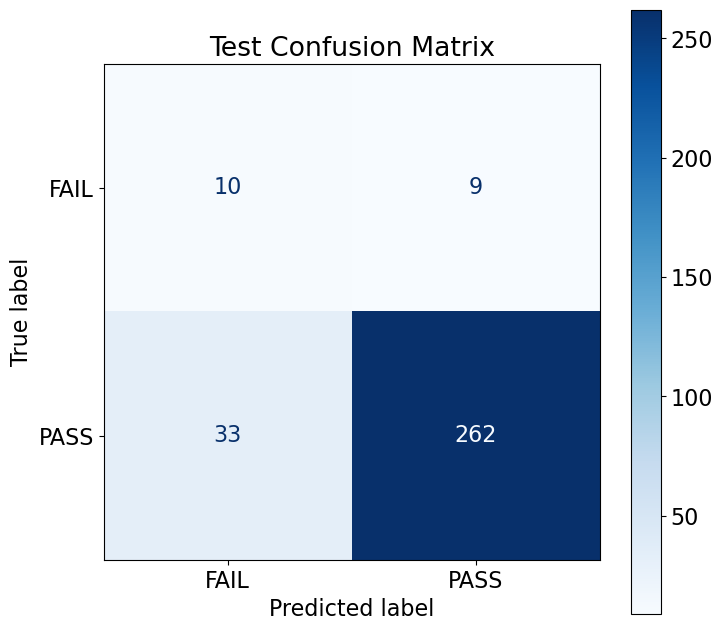

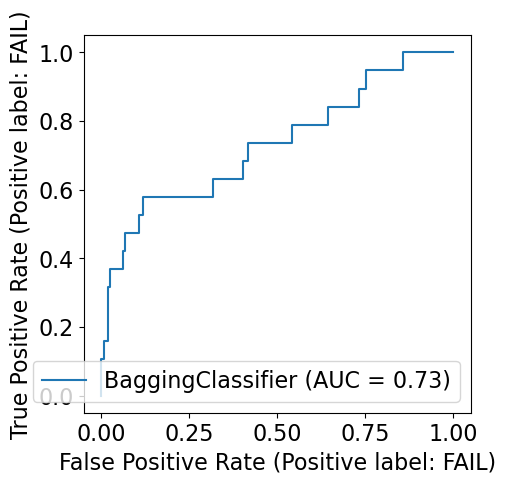

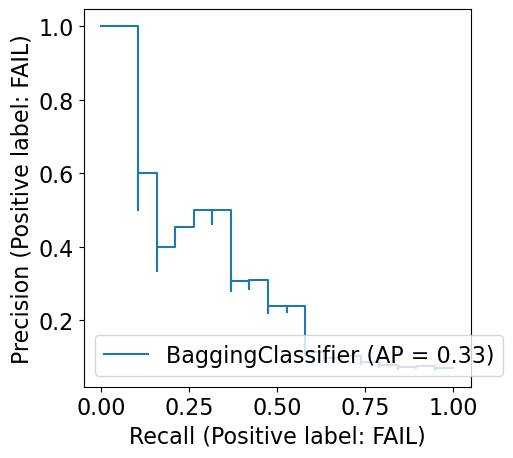

In [123]:
run_ML_process(X_resampled, y_resampled, X_test, y_test,BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=200,
                                                        min_samples_split=50,
                                                        random_state=100),
                  bootstrap_features=True, n_estimators=500))


Averace Train Accuracy: 0.9531482950039651
Test Accuracy :  0.8630573248407644
              precision    recall  f1-score   support

        FAIL       0.24      0.58      0.34        19
        PASS       0.97      0.88      0.92       295

    accuracy                           0.86       314
   macro avg       0.60      0.73      0.63       314
weighted avg       0.93      0.86      0.89       314

COST:  195
Kappa: 0.2764976958525346


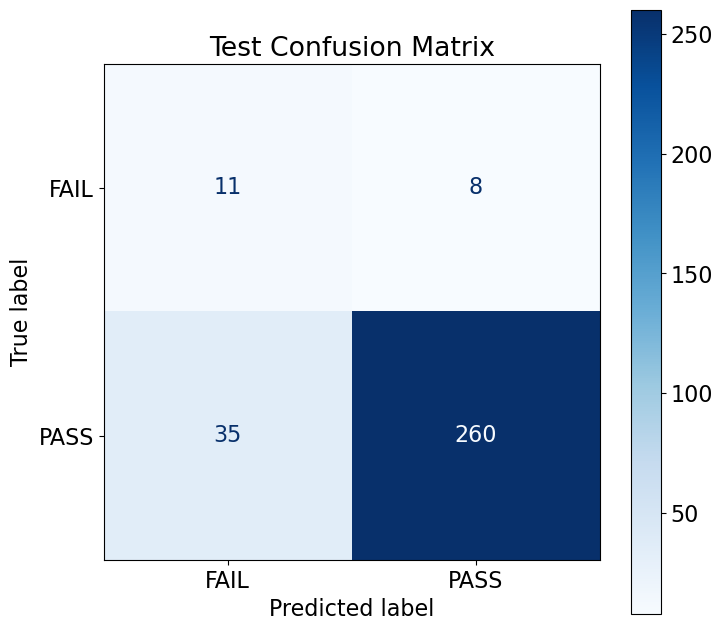

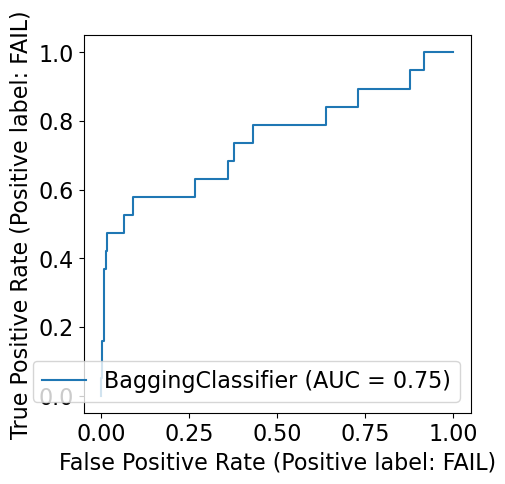

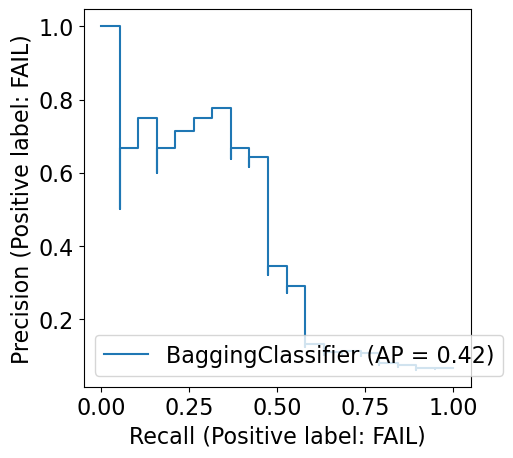

In [124]:
run_ML_process(X_resampled, y_resampled, X_test, y_test,BaggingClassifier(base_estimator=RandomForestClassifier
                                                                          (max_depth=1000,
                                                                          min_samples_split = 20)))

 